In [1]:
################################
## Import Libaries

###########################
## Import Torch Libaries
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import transforms
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import transforms
###########################
## Import standard libaries
import pandas as pd
import numpy as np
import os
import random
##########################
## Import PIL
from PIL import Image

#####################
## import SK learn libaries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
####################
## import matplot
import matplotlib.pyplot as plt

In [2]:
# !pip install torchvision

In [3]:
#####################
##Enable CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# !pip install onnxruntime
# !pip install onnxmltools
import onnxruntime 
import onnxmltools
from skl2onnx.common.data_types import FloatTensorType

In [5]:
######################
## View Class
class View(nn.Module):
    
    def __init__(self, shape):
        
        super().__init__()
        self.shape = shape,

    def forward(self, x):
        return x.view(*self.shape)



In [6]:
class EmotionDataset(Dataset):
    def __init__(self, data_path, transform=None):
        self.data_path = data_path
        self.transform = transform
        self.classes = os.listdir(data_path)
        self.images = []
        self.labels = []

        for i, emotion_class in enumerate(self.classes):
            class_path = os.path.join(data_path, emotion_class)
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                self.images.append(image_path)
                self.labels.append(i)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image_path = self.images[index]
        label = self.labels[index]

        # Open the image
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        # Convert label to a single index
        label = torch.tensor(label, dtype=torch.long)

        return image, label



In [7]:
data_path = './images'  # Update this to your actual path
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
])

emotion_dataset = EmotionDataset(data_path=data_path, transform=transform)


In [8]:

index = 0
image, label = emotion_dataset[index]



In [9]:

image.shape


torch.Size([3, 48, 48])

In [10]:

label


tensor(0)

In [11]:

#######################
##  Custom CNN 2 convulutional layer model
class Classifier_CNN_3_Layers(nn.Module):
        def __init__(self):
            super(Classifier_CNN_3_Layers, self).__init__()
            self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
            self.pool1= nn.MaxPool2d(kernel_size=2, stride = 2)
            self.conv2 = nn.Conv2d(64,128, kernel_size=3, stride=1, padding=1)
            self.pool2 = nn.MaxPool2d(kernel_size=2, stride = 2)
            self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
            self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.relu = nn.ReLU()
            self.fc1 = nn.Linear(256 * 6 * 6, 512)
            self.fc2 = nn.Linear(512, 1)
    
        def forward(self, x):
            x = self.conv1(x)
            x = self.relu(x)
            x = self.pool1(x)
            
            x = self.conv2(x)
            x = self.relu(x)
            x = self.pool2(x)
            
            x = self.conv3(x)
            x = self.relu(x)
            x = self.pool3(x)
            
            x = x.view(-1, 256 * 6 * 6)
            x = self.fc1(x)
            x = self.relu(x)
            x = self.fc2(x)
            return x



In [12]:

#######################
##  Custom CNN 2 convulutional layer model
class Classifier_CNN_5_Layers(nn.Module):
        def __init__(self):
            super(Classifier_CNN_5_Layers, self).__init__()
            self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
            self.pool1= nn.MaxPool2d(kernel_size=2, stride = 2)
            self.conv2 = nn.Conv2d(64,128, kernel_size=3, stride=1, padding=1)
            self.pool2 = nn.MaxPool2d(kernel_size=2, stride = 2)
            self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
            self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
            self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.conv5 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
            self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.relu = nn.ReLU()
            self.fc1 = nn.Linear(1024 * 6 * 6, 512)
            self.fc2 = nn.Linear(512, 1)
    
        def forward(self, x):
            x = self.conv1(x)
            x = self.relu(x)
            x = self.pool1(x)
            
            x = self.conv2(x)
            x = self.relu(x)
            x = self.pool2(x)
            
            x = self.conv3(x)
            x = self.relu(x)
            x = self.pool3(x)
            
            x = self.conv4(x)
            x = self.relu(x)
      
            
            x = self.conv5(x)
            x = self.relu(x)
 
            print(x.size()) 
            
            x = x.view(-1, 1024 * 6 * 6)
            x = self.fc1(x)
            x = self.relu(x)
            x = self.fc2(x)
            return x



In [13]:
###########################
# Split the dataset into training and testing sets
train_size = int(0.8 * len(emotion_dataset))
test_size = len(emotion_dataset) - train_size
train_dataset, test_dataset = random_split(emotion_dataset, [train_size, test_size])
###########################

In [14]:
###########################
## Define Test and train data loaders

# Define batch size
batch_size = 32

# Create DataLoader instances for training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

###########################

In [16]:
%%time
# Create an instance of the model, an optimizer, and a criterion
##########################
## change between 3 layers or 5 layers
cnn_classifier = Classifier_CNN_3_Layers()
#cnn_classifier = Classifier_CNN_5_Layers()

cnn_classifier.to(device)
## parameters and optimizer
optimizer = optim.SGD(cnn_classifier.parameters(), lr=0.1)
criterion = nn.BCEWithLogitsLoss()  ## Assuming it's a binary classification problem

# Training loop
epochs = 20

for epoch in range(epochs):
    # Training
    cnn_classifier.train()
    for i, (images, labels) in enumerate(train_loader):
        images,  labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_classifier(images)
        ##Examine predicted happy or sad
        predicted_labels = (outputs >= 0.5).float()
        
        ## uncomment or comment to control
        ## predicted prints
        
#         print("Predictions:", predicted_labels)
#         print("True Labels:", labels)    
        
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch + 1}/{epochs}, Iteration {i + 1}/{len(train_loader)}, Loss: {loss.item()}")


Epoch 1/20, Iteration 1/303, Loss: 0.6992462277412415
Epoch 1/20, Iteration 2/303, Loss: 0.6821365356445312
Epoch 1/20, Iteration 3/303, Loss: 0.6866430044174194
Epoch 1/20, Iteration 4/303, Loss: 0.6871508955955505
Epoch 1/20, Iteration 5/303, Loss: 0.6466887593269348
Epoch 1/20, Iteration 6/303, Loss: 0.6477553248405457
Epoch 1/20, Iteration 7/303, Loss: 0.6816120743751526
Epoch 1/20, Iteration 8/303, Loss: 0.6459097266197205
Epoch 1/20, Iteration 9/303, Loss: 0.6680840849876404
Epoch 1/20, Iteration 10/303, Loss: 0.6586099863052368
Epoch 1/20, Iteration 11/303, Loss: 0.68919837474823
Epoch 1/20, Iteration 12/303, Loss: 0.6575819849967957
Epoch 1/20, Iteration 13/303, Loss: 0.6770915985107422
Epoch 1/20, Iteration 14/303, Loss: 0.6877940893173218
Epoch 1/20, Iteration 15/303, Loss: 0.6295236945152283
Epoch 1/20, Iteration 16/303, Loss: 0.7046793699264526
Epoch 1/20, Iteration 17/303, Loss: 0.7011417150497437
Epoch 1/20, Iteration 18/303, Loss: 0.6742302775382996
Epoch 1/20, Iteration

Epoch 3/100, Iteration 268/303, Loss: 0.45317816734313965
Epoch 3/100, Iteration 269/303, Loss: 0.4777294397354126
Epoch 3/100, Iteration 270/303, Loss: 0.4163530766963959
Epoch 3/100, Iteration 271/303, Loss: 0.7153400182723999
Epoch 3/100, Iteration 272/303, Loss: 0.6770245432853699
Epoch 3/100, Iteration 273/303, Loss: 0.5716456770896912
Epoch 3/100, Iteration 274/303, Loss: 0.5258144736289978
Epoch 3/100, Iteration 275/303, Loss: 0.4851508140563965
Epoch 3/100, Iteration 276/303, Loss: 0.6296175718307495
Epoch 3/100, Iteration 277/303, Loss: 0.531254231929779
Epoch 3/100, Iteration 278/303, Loss: 0.5474787354469299
Epoch 3/100, Iteration 279/303, Loss: 0.585878849029541
Epoch 3/100, Iteration 280/303, Loss: 0.5920871496200562
Epoch 3/100, Iteration 281/303, Loss: 0.5609568953514099
Epoch 3/100, Iteration 282/303, Loss: 0.4901425242424011
Epoch 3/100, Iteration 283/303, Loss: 0.4326670467853546
Epoch 3/100, Iteration 284/303, Loss: 0.5437423586845398
Epoch 3/100, Iteration 285/303, 

Epoch 4/100, Iteration 112/303, Loss: 0.2999551296234131
Epoch 4/100, Iteration 113/303, Loss: 0.3902929127216339
Epoch 4/100, Iteration 114/303, Loss: 0.48242467641830444
Epoch 4/100, Iteration 115/303, Loss: 0.40803325176239014
Epoch 4/100, Iteration 116/303, Loss: 0.5083125829696655
Epoch 4/100, Iteration 117/303, Loss: 0.453347384929657
Epoch 4/100, Iteration 118/303, Loss: 0.4908488392829895
Epoch 4/100, Iteration 119/303, Loss: 0.45947301387786865
Epoch 4/100, Iteration 120/303, Loss: 0.4993976652622223
Epoch 4/100, Iteration 121/303, Loss: 0.45389407873153687
Epoch 4/100, Iteration 122/303, Loss: 0.37068840861320496
Epoch 4/100, Iteration 123/303, Loss: 0.40162932872772217
Epoch 4/100, Iteration 124/303, Loss: 0.37212830781936646
Epoch 4/100, Iteration 125/303, Loss: 0.5290371775627136
Epoch 4/100, Iteration 126/303, Loss: 0.4888649880886078
Epoch 4/100, Iteration 127/303, Loss: 0.5929295420646667
Epoch 4/100, Iteration 128/303, Loss: 0.6042279601097107
Epoch 4/100, Iteration 12

Epoch 4/100, Iteration 256/303, Loss: 0.4338597059249878
Epoch 4/100, Iteration 257/303, Loss: 0.47031062841415405
Epoch 4/100, Iteration 258/303, Loss: 0.4109383225440979
Epoch 4/100, Iteration 259/303, Loss: 0.5774783492088318
Epoch 4/100, Iteration 260/303, Loss: 0.6070187091827393
Epoch 4/100, Iteration 261/303, Loss: 0.46297237277030945
Epoch 4/100, Iteration 262/303, Loss: 0.4147648811340332
Epoch 4/100, Iteration 263/303, Loss: 0.48870664834976196
Epoch 4/100, Iteration 264/303, Loss: 0.4842190146446228
Epoch 4/100, Iteration 265/303, Loss: 0.4553413391113281
Epoch 4/100, Iteration 266/303, Loss: 0.40521007776260376
Epoch 4/100, Iteration 267/303, Loss: 0.49776989221572876
Epoch 4/100, Iteration 268/303, Loss: 0.38582733273506165
Epoch 4/100, Iteration 269/303, Loss: 0.5974091291427612
Epoch 4/100, Iteration 270/303, Loss: 0.4637390077114105
Epoch 4/100, Iteration 271/303, Loss: 0.47238752245903015
Epoch 4/100, Iteration 272/303, Loss: 0.41223418712615967
Epoch 4/100, Iteration 

Epoch 5/100, Iteration 99/303, Loss: 0.4152238667011261
Epoch 5/100, Iteration 100/303, Loss: 0.5268416404724121
Epoch 5/100, Iteration 101/303, Loss: 0.5816189050674438
Epoch 5/100, Iteration 102/303, Loss: 0.4814714193344116
Epoch 5/100, Iteration 103/303, Loss: 0.3698155879974365
Epoch 5/100, Iteration 104/303, Loss: 0.5245689749717712
Epoch 5/100, Iteration 105/303, Loss: 0.3843003809452057
Epoch 5/100, Iteration 106/303, Loss: 0.5674599409103394
Epoch 5/100, Iteration 107/303, Loss: 0.36427539587020874
Epoch 5/100, Iteration 108/303, Loss: 0.43323126435279846
Epoch 5/100, Iteration 109/303, Loss: 0.3894041180610657
Epoch 5/100, Iteration 110/303, Loss: 0.5682709217071533
Epoch 5/100, Iteration 111/303, Loss: 0.33498403429985046
Epoch 5/100, Iteration 112/303, Loss: 0.43059447407722473
Epoch 5/100, Iteration 113/303, Loss: 0.3960123062133789
Epoch 5/100, Iteration 114/303, Loss: 0.4483646750450134
Epoch 5/100, Iteration 115/303, Loss: 0.3151906728744507
Epoch 5/100, Iteration 116/3

Epoch 5/100, Iteration 243/303, Loss: 0.3562980592250824
Epoch 5/100, Iteration 244/303, Loss: 0.5076432824134827
Epoch 5/100, Iteration 245/303, Loss: 0.34141263365745544
Epoch 5/100, Iteration 246/303, Loss: 0.3252997100353241
Epoch 5/100, Iteration 247/303, Loss: 0.31881991028785706
Epoch 5/100, Iteration 248/303, Loss: 0.3241159915924072
Epoch 5/100, Iteration 249/303, Loss: 0.4923136532306671
Epoch 5/100, Iteration 250/303, Loss: 0.47154760360717773
Epoch 5/100, Iteration 251/303, Loss: 0.4781152606010437
Epoch 5/100, Iteration 252/303, Loss: 0.6034704446792603
Epoch 5/100, Iteration 253/303, Loss: 0.4774335026741028
Epoch 5/100, Iteration 254/303, Loss: 0.3719828426837921
Epoch 5/100, Iteration 255/303, Loss: 0.22650675475597382
Epoch 5/100, Iteration 256/303, Loss: 0.5015940070152283
Epoch 5/100, Iteration 257/303, Loss: 0.46157294511795044
Epoch 5/100, Iteration 258/303, Loss: 0.36170274019241333
Epoch 5/100, Iteration 259/303, Loss: 0.4067073464393616
Epoch 5/100, Iteration 26

Epoch 6/100, Iteration 85/303, Loss: 0.5109819769859314
Epoch 6/100, Iteration 86/303, Loss: 0.32472190260887146
Epoch 6/100, Iteration 87/303, Loss: 0.5105720162391663
Epoch 6/100, Iteration 88/303, Loss: 0.4381202161312103
Epoch 6/100, Iteration 89/303, Loss: 0.5318964123725891
Epoch 6/100, Iteration 90/303, Loss: 0.38404881954193115
Epoch 6/100, Iteration 91/303, Loss: 0.285000741481781
Epoch 6/100, Iteration 92/303, Loss: 0.33899012207984924
Epoch 6/100, Iteration 93/303, Loss: 0.2893297076225281
Epoch 6/100, Iteration 94/303, Loss: 0.2600529193878174
Epoch 6/100, Iteration 95/303, Loss: 0.44201427698135376
Epoch 6/100, Iteration 96/303, Loss: 0.38786664605140686
Epoch 6/100, Iteration 97/303, Loss: 0.42797619104385376
Epoch 6/100, Iteration 98/303, Loss: 0.35848313570022583
Epoch 6/100, Iteration 99/303, Loss: 0.36648133397102356
Epoch 6/100, Iteration 100/303, Loss: 0.27567315101623535
Epoch 6/100, Iteration 101/303, Loss: 0.40953734517097473
Epoch 6/100, Iteration 102/303, Loss:

Epoch 6/100, Iteration 229/303, Loss: 0.47836941480636597
Epoch 6/100, Iteration 230/303, Loss: 0.3162664473056793
Epoch 6/100, Iteration 231/303, Loss: 0.3882555365562439
Epoch 6/100, Iteration 232/303, Loss: 0.37833210825920105
Epoch 6/100, Iteration 233/303, Loss: 0.3968183994293213
Epoch 6/100, Iteration 234/303, Loss: 0.23476886749267578
Epoch 6/100, Iteration 235/303, Loss: 0.17977052927017212
Epoch 6/100, Iteration 236/303, Loss: 0.3235241770744324
Epoch 6/100, Iteration 237/303, Loss: 0.3042212426662445
Epoch 6/100, Iteration 238/303, Loss: 0.30845361948013306
Epoch 6/100, Iteration 239/303, Loss: 0.5381038784980774
Epoch 6/100, Iteration 240/303, Loss: 0.39147165417671204
Epoch 6/100, Iteration 241/303, Loss: 0.34751269221305847
Epoch 6/100, Iteration 242/303, Loss: 0.3299848437309265
Epoch 6/100, Iteration 243/303, Loss: 0.4686719477176666
Epoch 6/100, Iteration 244/303, Loss: 0.23602792620658875
Epoch 6/100, Iteration 245/303, Loss: 0.3339669406414032
Epoch 6/100, Iteration 

Epoch 7/100, Iteration 71/303, Loss: 0.2540517747402191
Epoch 7/100, Iteration 72/303, Loss: 0.3937702476978302
Epoch 7/100, Iteration 73/303, Loss: 0.3311103582382202
Epoch 7/100, Iteration 74/303, Loss: 0.24235525727272034
Epoch 7/100, Iteration 75/303, Loss: 0.3337278366088867
Epoch 7/100, Iteration 76/303, Loss: 0.3251509368419647
Epoch 7/100, Iteration 77/303, Loss: 0.5882314443588257
Epoch 7/100, Iteration 78/303, Loss: 0.3954012989997864
Epoch 7/100, Iteration 79/303, Loss: 0.42559683322906494
Epoch 7/100, Iteration 80/303, Loss: 0.39676591753959656
Epoch 7/100, Iteration 81/303, Loss: 0.31138527393341064
Epoch 7/100, Iteration 82/303, Loss: 0.17516489326953888
Epoch 7/100, Iteration 83/303, Loss: 0.3131508529186249
Epoch 7/100, Iteration 84/303, Loss: 0.3893415331840515
Epoch 7/100, Iteration 85/303, Loss: 0.33166754245758057
Epoch 7/100, Iteration 86/303, Loss: 0.3448416590690613
Epoch 7/100, Iteration 87/303, Loss: 0.20330490171909332
Epoch 7/100, Iteration 88/303, Loss: 0.21

Epoch 7/100, Iteration 215/303, Loss: 0.26763132214546204
Epoch 7/100, Iteration 216/303, Loss: 0.3686026632785797
Epoch 7/100, Iteration 217/303, Loss: 0.3656667172908783
Epoch 7/100, Iteration 218/303, Loss: 0.4092199504375458
Epoch 7/100, Iteration 219/303, Loss: 0.36425310373306274
Epoch 7/100, Iteration 220/303, Loss: 0.43498021364212036
Epoch 7/100, Iteration 221/303, Loss: 0.18409870564937592
Epoch 7/100, Iteration 222/303, Loss: 0.31583675742149353
Epoch 7/100, Iteration 223/303, Loss: 0.25876471400260925
Epoch 7/100, Iteration 224/303, Loss: 0.3821200132369995
Epoch 7/100, Iteration 225/303, Loss: 0.34312912821769714
Epoch 7/100, Iteration 226/303, Loss: 0.1672942191362381
Epoch 7/100, Iteration 227/303, Loss: 0.44427672028541565
Epoch 7/100, Iteration 228/303, Loss: 0.6315540075302124
Epoch 7/100, Iteration 229/303, Loss: 0.33309435844421387
Epoch 7/100, Iteration 230/303, Loss: 0.25765618681907654
Epoch 7/100, Iteration 231/303, Loss: 0.22708682715892792
Epoch 7/100, Iterati

Epoch 8/100, Iteration 56/303, Loss: 0.28935590386390686
Epoch 8/100, Iteration 57/303, Loss: 0.27756381034851074
Epoch 8/100, Iteration 58/303, Loss: 0.3399820327758789
Epoch 8/100, Iteration 59/303, Loss: 0.5660662651062012
Epoch 8/100, Iteration 60/303, Loss: 0.2292822152376175
Epoch 8/100, Iteration 61/303, Loss: 0.4340226948261261
Epoch 8/100, Iteration 62/303, Loss: 0.4448907971382141
Epoch 8/100, Iteration 63/303, Loss: 0.2945774495601654
Epoch 8/100, Iteration 64/303, Loss: 0.2516244053840637
Epoch 8/100, Iteration 65/303, Loss: 0.35594427585601807
Epoch 8/100, Iteration 66/303, Loss: 0.29290103912353516
Epoch 8/100, Iteration 67/303, Loss: 0.25785353779792786
Epoch 8/100, Iteration 68/303, Loss: 0.18647268414497375
Epoch 8/100, Iteration 69/303, Loss: 0.19162194430828094
Epoch 8/100, Iteration 70/303, Loss: 0.41836977005004883
Epoch 8/100, Iteration 71/303, Loss: 0.2903064787387848
Epoch 8/100, Iteration 72/303, Loss: 0.37558817863464355
Epoch 8/100, Iteration 73/303, Loss: 0.

Epoch 8/100, Iteration 200/303, Loss: 0.2784959077835083
Epoch 8/100, Iteration 201/303, Loss: 0.17678846418857574
Epoch 8/100, Iteration 202/303, Loss: 0.2005428671836853
Epoch 8/100, Iteration 203/303, Loss: 0.2623157799243927
Epoch 8/100, Iteration 204/303, Loss: 0.2703816890716553
Epoch 8/100, Iteration 205/303, Loss: 0.28665924072265625
Epoch 8/100, Iteration 206/303, Loss: 0.1808892786502838
Epoch 8/100, Iteration 207/303, Loss: 0.46501535177230835
Epoch 8/100, Iteration 208/303, Loss: 0.12482251226902008
Epoch 8/100, Iteration 209/303, Loss: 0.43163982033729553
Epoch 8/100, Iteration 210/303, Loss: 0.19616509974002838
Epoch 8/100, Iteration 211/303, Loss: 0.2789793014526367
Epoch 8/100, Iteration 212/303, Loss: 0.1676137000322342
Epoch 8/100, Iteration 213/303, Loss: 0.23210376501083374
Epoch 8/100, Iteration 214/303, Loss: 0.4697216749191284
Epoch 8/100, Iteration 215/303, Loss: 0.44470253586769104
Epoch 8/100, Iteration 216/303, Loss: 0.33142316341400146
Epoch 8/100, Iteration

Epoch 9/100, Iteration 42/303, Loss: 0.14726975560188293
Epoch 9/100, Iteration 43/303, Loss: 0.2406192272901535
Epoch 9/100, Iteration 44/303, Loss: 0.5944820046424866
Epoch 9/100, Iteration 45/303, Loss: 0.3127453923225403
Epoch 9/100, Iteration 46/303, Loss: 0.20476597547531128
Epoch 9/100, Iteration 47/303, Loss: 0.20402196049690247
Epoch 9/100, Iteration 48/303, Loss: 0.2538444697856903
Epoch 9/100, Iteration 49/303, Loss: 0.3371761441230774
Epoch 9/100, Iteration 50/303, Loss: 0.3123800456523895
Epoch 9/100, Iteration 51/303, Loss: 0.14316071569919586
Epoch 9/100, Iteration 52/303, Loss: 0.20527859032154083
Epoch 9/100, Iteration 53/303, Loss: 0.23703010380268097
Epoch 9/100, Iteration 54/303, Loss: 0.17370173335075378
Epoch 9/100, Iteration 55/303, Loss: 0.3151203989982605
Epoch 9/100, Iteration 56/303, Loss: 0.366852730512619
Epoch 9/100, Iteration 57/303, Loss: 0.17323964834213257
Epoch 9/100, Iteration 58/303, Loss: 0.23532871901988983
Epoch 9/100, Iteration 59/303, Loss: 0.2

Epoch 9/100, Iteration 186/303, Loss: 0.3085290491580963
Epoch 9/100, Iteration 187/303, Loss: 0.17704130709171295
Epoch 9/100, Iteration 188/303, Loss: 0.07877790927886963
Epoch 9/100, Iteration 189/303, Loss: 0.2856239676475525
Epoch 9/100, Iteration 190/303, Loss: 0.2668469548225403
Epoch 9/100, Iteration 191/303, Loss: 0.28787118196487427
Epoch 9/100, Iteration 192/303, Loss: 0.1357324719429016
Epoch 9/100, Iteration 193/303, Loss: 0.3225660026073456
Epoch 9/100, Iteration 194/303, Loss: 0.2985858619213104
Epoch 9/100, Iteration 195/303, Loss: 0.25257211923599243
Epoch 9/100, Iteration 196/303, Loss: 0.4352225065231323
Epoch 9/100, Iteration 197/303, Loss: 0.3378274440765381
Epoch 9/100, Iteration 198/303, Loss: 0.43947333097457886
Epoch 9/100, Iteration 199/303, Loss: 0.35279226303100586
Epoch 9/100, Iteration 200/303, Loss: 0.08756353706121445
Epoch 9/100, Iteration 201/303, Loss: 0.2037692666053772
Epoch 9/100, Iteration 202/303, Loss: 0.2012515664100647
Epoch 9/100, Iteration 2

Epoch 10/100, Iteration 26/303, Loss: 0.2276173233985901
Epoch 10/100, Iteration 27/303, Loss: 0.18167829513549805
Epoch 10/100, Iteration 28/303, Loss: 0.07579445093870163
Epoch 10/100, Iteration 29/303, Loss: 0.19993174076080322
Epoch 10/100, Iteration 30/303, Loss: 0.32839083671569824
Epoch 10/100, Iteration 31/303, Loss: 0.22464847564697266
Epoch 10/100, Iteration 32/303, Loss: 0.12038737535476685
Epoch 10/100, Iteration 33/303, Loss: 0.22659143805503845
Epoch 10/100, Iteration 34/303, Loss: 0.19662880897521973
Epoch 10/100, Iteration 35/303, Loss: 0.4122430682182312
Epoch 10/100, Iteration 36/303, Loss: 0.5001237988471985
Epoch 10/100, Iteration 37/303, Loss: 0.39687758684158325
Epoch 10/100, Iteration 38/303, Loss: 0.2301076203584671
Epoch 10/100, Iteration 39/303, Loss: 0.14924800395965576
Epoch 10/100, Iteration 40/303, Loss: 0.2981572449207306
Epoch 10/100, Iteration 41/303, Loss: 0.17385762929916382
Epoch 10/100, Iteration 42/303, Loss: 0.21318475902080536
Epoch 10/100, Itera

Epoch 10/100, Iteration 169/303, Loss: 0.36798781156539917
Epoch 10/100, Iteration 170/303, Loss: 0.1877036690711975
Epoch 10/100, Iteration 171/303, Loss: 0.18133756518363953
Epoch 10/100, Iteration 172/303, Loss: 0.1874372661113739
Epoch 10/100, Iteration 173/303, Loss: 0.2299380600452423
Epoch 10/100, Iteration 174/303, Loss: 0.08729883283376694
Epoch 10/100, Iteration 175/303, Loss: 0.318970263004303
Epoch 10/100, Iteration 176/303, Loss: 0.19055640697479248
Epoch 10/100, Iteration 177/303, Loss: 0.22881342470645905
Epoch 10/100, Iteration 178/303, Loss: 0.2810472548007965
Epoch 10/100, Iteration 179/303, Loss: 0.18048138916492462
Epoch 10/100, Iteration 180/303, Loss: 0.2290312647819519
Epoch 10/100, Iteration 181/303, Loss: 0.09448277205228806
Epoch 10/100, Iteration 182/303, Loss: 0.277959942817688
Epoch 10/100, Iteration 183/303, Loss: 0.17016983032226562
Epoch 10/100, Iteration 184/303, Loss: 0.2015252560377121
Epoch 10/100, Iteration 185/303, Loss: 0.2073054015636444
Epoch 10

Epoch 11/100, Iteration 6/303, Loss: 0.22140109539031982
Epoch 11/100, Iteration 7/303, Loss: 0.2879282236099243
Epoch 11/100, Iteration 8/303, Loss: 0.15615589916706085
Epoch 11/100, Iteration 9/303, Loss: 0.23597539961338043
Epoch 11/100, Iteration 10/303, Loss: 0.28805476427078247
Epoch 11/100, Iteration 11/303, Loss: 0.22732645273208618
Epoch 11/100, Iteration 12/303, Loss: 0.19970904290676117
Epoch 11/100, Iteration 13/303, Loss: 0.13242913782596588
Epoch 11/100, Iteration 14/303, Loss: 0.1019364446401596
Epoch 11/100, Iteration 15/303, Loss: 0.12482032179832458
Epoch 11/100, Iteration 16/303, Loss: 0.10570037364959717
Epoch 11/100, Iteration 17/303, Loss: 0.18280580639839172
Epoch 11/100, Iteration 18/303, Loss: 0.13541525602340698
Epoch 11/100, Iteration 19/303, Loss: 0.36599865555763245
Epoch 11/100, Iteration 20/303, Loss: 0.15537956357002258
Epoch 11/100, Iteration 21/303, Loss: 0.1674119532108307
Epoch 11/100, Iteration 22/303, Loss: 0.18846383690834045
Epoch 11/100, Iterati

Epoch 11/100, Iteration 149/303, Loss: 0.07590623944997787
Epoch 11/100, Iteration 150/303, Loss: 0.29193899035453796
Epoch 11/100, Iteration 151/303, Loss: 0.17119960486888885
Epoch 11/100, Iteration 152/303, Loss: 0.19380676746368408
Epoch 11/100, Iteration 153/303, Loss: 0.15241380035877228
Epoch 11/100, Iteration 154/303, Loss: 0.2287188023328781
Epoch 11/100, Iteration 155/303, Loss: 0.1319923847913742
Epoch 11/100, Iteration 156/303, Loss: 0.1581232249736786
Epoch 11/100, Iteration 157/303, Loss: 0.14121763408184052
Epoch 11/100, Iteration 158/303, Loss: 0.24414797127246857
Epoch 11/100, Iteration 159/303, Loss: 0.2061225026845932
Epoch 11/100, Iteration 160/303, Loss: 0.2063131183385849
Epoch 11/100, Iteration 161/303, Loss: 0.210857093334198
Epoch 11/100, Iteration 162/303, Loss: 0.15806818008422852
Epoch 11/100, Iteration 163/303, Loss: 0.1580839455127716
Epoch 11/100, Iteration 164/303, Loss: 0.2555827796459198
Epoch 11/100, Iteration 165/303, Loss: 0.0990656316280365
Epoch 1

Epoch 11/100, Iteration 289/303, Loss: 0.2622694671154022
Epoch 11/100, Iteration 290/303, Loss: 0.21893522143363953
Epoch 11/100, Iteration 291/303, Loss: 0.2424069344997406
Epoch 11/100, Iteration 292/303, Loss: 0.39937281608581543
Epoch 11/100, Iteration 293/303, Loss: 0.18736787140369415
Epoch 11/100, Iteration 294/303, Loss: 0.16261565685272217
Epoch 11/100, Iteration 295/303, Loss: 0.335752934217453
Epoch 11/100, Iteration 296/303, Loss: 0.5333117246627808
Epoch 11/100, Iteration 297/303, Loss: 0.18712016940116882
Epoch 11/100, Iteration 298/303, Loss: 0.19639015197753906
Epoch 11/100, Iteration 299/303, Loss: 0.21074064075946808
Epoch 11/100, Iteration 300/303, Loss: 0.10666028410196304
Epoch 11/100, Iteration 301/303, Loss: 0.19131237268447876
Epoch 11/100, Iteration 302/303, Loss: 0.16455811262130737
Epoch 11/100, Iteration 303/303, Loss: 0.146781325340271
Epoch 12/100, Iteration 1/303, Loss: 0.1700795590877533
Epoch 12/100, Iteration 2/303, Loss: 0.11120828986167908
Epoch 12/

Epoch 12/100, Iteration 128/303, Loss: 0.19125598669052124
Epoch 12/100, Iteration 129/303, Loss: 0.07737307995557785
Epoch 12/100, Iteration 130/303, Loss: 0.2594899535179138
Epoch 12/100, Iteration 131/303, Loss: 0.1685756891965866
Epoch 12/100, Iteration 132/303, Loss: 0.26020798087120056
Epoch 12/100, Iteration 133/303, Loss: 0.11568066477775574
Epoch 12/100, Iteration 134/303, Loss: 0.1887163668870926
Epoch 12/100, Iteration 135/303, Loss: 0.17329123616218567
Epoch 12/100, Iteration 136/303, Loss: 0.06914839893579483
Epoch 12/100, Iteration 137/303, Loss: 0.1975310742855072
Epoch 12/100, Iteration 138/303, Loss: 0.10934582352638245
Epoch 12/100, Iteration 139/303, Loss: 0.09182053804397583
Epoch 12/100, Iteration 140/303, Loss: 0.07540915906429291
Epoch 12/100, Iteration 141/303, Loss: 0.042244866490364075
Epoch 12/100, Iteration 142/303, Loss: 0.07374371588230133
Epoch 12/100, Iteration 143/303, Loss: 0.03699565306305885
Epoch 12/100, Iteration 144/303, Loss: 0.15512269735336304


Epoch 12/100, Iteration 268/303, Loss: 0.0658053308725357
Epoch 12/100, Iteration 269/303, Loss: 0.2217462658882141
Epoch 12/100, Iteration 270/303, Loss: 0.09840217977762222
Epoch 12/100, Iteration 271/303, Loss: 0.11796864122152328
Epoch 12/100, Iteration 272/303, Loss: 0.09224370121955872
Epoch 12/100, Iteration 273/303, Loss: 0.10775434225797653
Epoch 12/100, Iteration 274/303, Loss: 0.17521411180496216
Epoch 12/100, Iteration 275/303, Loss: 0.23921149969100952
Epoch 12/100, Iteration 276/303, Loss: 0.06363076716661453
Epoch 12/100, Iteration 277/303, Loss: 0.276406854391098
Epoch 12/100, Iteration 278/303, Loss: 0.11086831241846085
Epoch 12/100, Iteration 279/303, Loss: 0.09974823892116547
Epoch 12/100, Iteration 280/303, Loss: 0.17047449946403503
Epoch 12/100, Iteration 281/303, Loss: 0.13520370423793793
Epoch 12/100, Iteration 282/303, Loss: 0.1008571982383728
Epoch 12/100, Iteration 283/303, Loss: 0.06442482769489288
Epoch 12/100, Iteration 284/303, Loss: 0.18119029700756073
Ep

Epoch 13/100, Iteration 108/303, Loss: 0.03407099097967148
Epoch 13/100, Iteration 109/303, Loss: 0.03168356418609619
Epoch 13/100, Iteration 110/303, Loss: 0.013732517138123512
Epoch 13/100, Iteration 111/303, Loss: 0.16849544644355774
Epoch 13/100, Iteration 112/303, Loss: 0.07487145811319351
Epoch 13/100, Iteration 113/303, Loss: 0.1475450098514557
Epoch 13/100, Iteration 114/303, Loss: 0.07516267895698547
Epoch 13/100, Iteration 115/303, Loss: 0.11345244944095612
Epoch 13/100, Iteration 116/303, Loss: 0.13942106068134308
Epoch 13/100, Iteration 117/303, Loss: 0.22567306458950043
Epoch 13/100, Iteration 118/303, Loss: 0.1345774531364441
Epoch 13/100, Iteration 119/303, Loss: 0.1661583036184311
Epoch 13/100, Iteration 120/303, Loss: 0.16511847078800201
Epoch 13/100, Iteration 121/303, Loss: 0.056140728294849396
Epoch 13/100, Iteration 122/303, Loss: 0.07305687665939331
Epoch 13/100, Iteration 123/303, Loss: 0.09482356160879135
Epoch 13/100, Iteration 124/303, Loss: 0.0656547769904136

Epoch 13/100, Iteration 249/303, Loss: 0.18695294857025146
Epoch 13/100, Iteration 250/303, Loss: 0.12599866092205048
Epoch 13/100, Iteration 251/303, Loss: 0.06696636229753494
Epoch 13/100, Iteration 252/303, Loss: 0.11214446276426315
Epoch 13/100, Iteration 253/303, Loss: 0.19054014980793
Epoch 13/100, Iteration 254/303, Loss: 0.0978810042142868
Epoch 13/100, Iteration 255/303, Loss: 0.12730048596858978
Epoch 13/100, Iteration 256/303, Loss: 0.09660495072603226
Epoch 13/100, Iteration 257/303, Loss: 0.15068474411964417
Epoch 13/100, Iteration 258/303, Loss: 0.027489425614476204
Epoch 13/100, Iteration 259/303, Loss: 0.11531169712543488
Epoch 13/100, Iteration 260/303, Loss: 0.04964398965239525
Epoch 13/100, Iteration 261/303, Loss: 0.04811285436153412
Epoch 13/100, Iteration 262/303, Loss: 0.24659596383571625
Epoch 13/100, Iteration 263/303, Loss: 0.12040973454713821
Epoch 13/100, Iteration 264/303, Loss: 0.11299546808004379
Epoch 13/100, Iteration 265/303, Loss: 0.20787328481674194


Epoch 14/100, Iteration 88/303, Loss: 0.07340916246175766
Epoch 14/100, Iteration 89/303, Loss: 0.02512303553521633
Epoch 14/100, Iteration 90/303, Loss: 0.052325841039419174
Epoch 14/100, Iteration 91/303, Loss: 0.02041805163025856
Epoch 14/100, Iteration 92/303, Loss: 0.04450085014104843
Epoch 14/100, Iteration 93/303, Loss: 0.056042470037937164
Epoch 14/100, Iteration 94/303, Loss: 0.057251617312431335
Epoch 14/100, Iteration 95/303, Loss: 0.06229644641280174
Epoch 14/100, Iteration 96/303, Loss: 0.056696150451898575
Epoch 14/100, Iteration 97/303, Loss: 0.27430102229118347
Epoch 14/100, Iteration 98/303, Loss: 0.1599799245595932
Epoch 14/100, Iteration 99/303, Loss: 0.07236634939908981
Epoch 14/100, Iteration 100/303, Loss: 0.0907873809337616
Epoch 14/100, Iteration 101/303, Loss: 0.0793147161602974
Epoch 14/100, Iteration 102/303, Loss: 0.13870438933372498
Epoch 14/100, Iteration 103/303, Loss: 0.10487954318523407
Epoch 14/100, Iteration 104/303, Loss: 0.11089435964822769
Epoch 14

Epoch 14/100, Iteration 229/303, Loss: 0.21846716105937958
Epoch 14/100, Iteration 230/303, Loss: 0.15089631080627441
Epoch 14/100, Iteration 231/303, Loss: 0.07004346698522568
Epoch 14/100, Iteration 232/303, Loss: 0.06217261403799057
Epoch 14/100, Iteration 233/303, Loss: 0.07876275479793549
Epoch 14/100, Iteration 234/303, Loss: 0.11198160797357559
Epoch 14/100, Iteration 235/303, Loss: 0.11706280708312988
Epoch 14/100, Iteration 236/303, Loss: 0.09722928702831268
Epoch 14/100, Iteration 237/303, Loss: 0.11162041127681732
Epoch 14/100, Iteration 238/303, Loss: 0.1957278996706009
Epoch 14/100, Iteration 239/303, Loss: 0.06641335785388947
Epoch 14/100, Iteration 240/303, Loss: 0.014613967388868332
Epoch 14/100, Iteration 241/303, Loss: 0.05468084290623665
Epoch 14/100, Iteration 242/303, Loss: 0.17676116526126862
Epoch 14/100, Iteration 243/303, Loss: 0.1724562644958496
Epoch 14/100, Iteration 244/303, Loss: 0.052425891160964966
Epoch 14/100, Iteration 245/303, Loss: 0.119640775024890

Epoch 15/100, Iteration 67/303, Loss: 0.053957752883434296
Epoch 15/100, Iteration 68/303, Loss: 0.03312398120760918
Epoch 15/100, Iteration 69/303, Loss: 0.00884188525378704
Epoch 15/100, Iteration 70/303, Loss: 0.01679699495434761
Epoch 15/100, Iteration 71/303, Loss: 0.00700295390561223
Epoch 15/100, Iteration 72/303, Loss: 0.08139398694038391
Epoch 15/100, Iteration 73/303, Loss: 0.05344805121421814
Epoch 15/100, Iteration 74/303, Loss: 0.14368410408496857
Epoch 15/100, Iteration 75/303, Loss: 0.05357503518462181
Epoch 15/100, Iteration 76/303, Loss: 0.01840713806450367
Epoch 15/100, Iteration 77/303, Loss: 0.031532835215330124
Epoch 15/100, Iteration 78/303, Loss: 0.04100582376122475
Epoch 15/100, Iteration 79/303, Loss: 0.027880460023880005
Epoch 15/100, Iteration 80/303, Loss: 0.05870669335126877
Epoch 15/100, Iteration 81/303, Loss: 0.17523369193077087
Epoch 15/100, Iteration 82/303, Loss: 0.08259039372205734
Epoch 15/100, Iteration 83/303, Loss: 0.03764602914452553
Epoch 15/10

Epoch 15/100, Iteration 208/303, Loss: 0.22433502972126007
Epoch 15/100, Iteration 209/303, Loss: 0.1638949066400528
Epoch 15/100, Iteration 210/303, Loss: 0.1136832907795906
Epoch 15/100, Iteration 211/303, Loss: 0.02878035418689251
Epoch 15/100, Iteration 212/303, Loss: 0.08013381063938141
Epoch 15/100, Iteration 213/303, Loss: 0.03840865567326546
Epoch 15/100, Iteration 214/303, Loss: 0.1999487727880478
Epoch 15/100, Iteration 215/303, Loss: 0.13355442881584167
Epoch 15/100, Iteration 216/303, Loss: 0.2668529748916626
Epoch 15/100, Iteration 217/303, Loss: 0.04257895052433014
Epoch 15/100, Iteration 218/303, Loss: 0.08520153164863586
Epoch 15/100, Iteration 219/303, Loss: 0.03747548535466194
Epoch 15/100, Iteration 220/303, Loss: 0.17176108062267303
Epoch 15/100, Iteration 221/303, Loss: 0.015010058879852295
Epoch 15/100, Iteration 222/303, Loss: 0.03395708277821541
Epoch 15/100, Iteration 223/303, Loss: 0.0549410805106163
Epoch 15/100, Iteration 224/303, Loss: 0.09761040657758713
E

Epoch 16/100, Iteration 45/303, Loss: 0.012507162988185883
Epoch 16/100, Iteration 46/303, Loss: 0.032042257487773895
Epoch 16/100, Iteration 47/303, Loss: 0.055593132972717285
Epoch 16/100, Iteration 48/303, Loss: 0.012413221411406994
Epoch 16/100, Iteration 49/303, Loss: 0.0094883032143116
Epoch 16/100, Iteration 50/303, Loss: 0.05601474642753601
Epoch 16/100, Iteration 51/303, Loss: 0.03168632462620735
Epoch 16/100, Iteration 52/303, Loss: 0.020996183156967163
Epoch 16/100, Iteration 53/303, Loss: 0.007729736622422934
Epoch 16/100, Iteration 54/303, Loss: 0.012371540069580078
Epoch 16/100, Iteration 55/303, Loss: 0.0973970890045166
Epoch 16/100, Iteration 56/303, Loss: 0.07417579740285873
Epoch 16/100, Iteration 57/303, Loss: 0.015397953800857067
Epoch 16/100, Iteration 58/303, Loss: 0.016293087974190712
Epoch 16/100, Iteration 59/303, Loss: 0.016621019691228867
Epoch 16/100, Iteration 60/303, Loss: 0.006450934335589409
Epoch 16/100, Iteration 61/303, Loss: 0.0712815374135971
Epoch 

Epoch 16/100, Iteration 185/303, Loss: 0.04330167919397354
Epoch 16/100, Iteration 186/303, Loss: 0.016904689371585846
Epoch 16/100, Iteration 187/303, Loss: 0.06995371729135513
Epoch 16/100, Iteration 188/303, Loss: 0.01588720642030239
Epoch 16/100, Iteration 189/303, Loss: 0.05269927904009819
Epoch 16/100, Iteration 190/303, Loss: 0.09296755492687225
Epoch 16/100, Iteration 191/303, Loss: 0.046095121651887894
Epoch 16/100, Iteration 192/303, Loss: 0.08025649189949036
Epoch 16/100, Iteration 193/303, Loss: 0.01901298388838768
Epoch 16/100, Iteration 194/303, Loss: 0.09959666430950165
Epoch 16/100, Iteration 195/303, Loss: 0.044348638504743576
Epoch 16/100, Iteration 196/303, Loss: 0.03255641087889671
Epoch 16/100, Iteration 197/303, Loss: 0.0735684186220169
Epoch 16/100, Iteration 198/303, Loss: 0.014175294898450375
Epoch 16/100, Iteration 199/303, Loss: 0.14126594364643097
Epoch 16/100, Iteration 200/303, Loss: 0.03453043848276138
Epoch 16/100, Iteration 201/303, Loss: 0.017039829865

Epoch 17/100, Iteration 22/303, Loss: 0.04850266873836517
Epoch 17/100, Iteration 23/303, Loss: 0.0059859538450837135
Epoch 17/100, Iteration 24/303, Loss: 0.009475731290876865
Epoch 17/100, Iteration 25/303, Loss: 0.024701306596398354
Epoch 17/100, Iteration 26/303, Loss: 0.021090762689709663
Epoch 17/100, Iteration 27/303, Loss: 0.05757284536957741
Epoch 17/100, Iteration 28/303, Loss: 0.022744379937648773
Epoch 17/100, Iteration 29/303, Loss: 0.013802040368318558
Epoch 17/100, Iteration 30/303, Loss: 0.007202723063528538
Epoch 17/100, Iteration 31/303, Loss: 0.03183313459157944
Epoch 17/100, Iteration 32/303, Loss: 0.032663494348526
Epoch 17/100, Iteration 33/303, Loss: 0.02174285613000393
Epoch 17/100, Iteration 34/303, Loss: 0.03805641829967499
Epoch 17/100, Iteration 35/303, Loss: 0.020680522546172142
Epoch 17/100, Iteration 36/303, Loss: 0.00420382572337985
Epoch 17/100, Iteration 37/303, Loss: 0.00874107051640749
Epoch 17/100, Iteration 38/303, Loss: 0.02429373934864998
Epoch 1

Epoch 17/100, Iteration 162/303, Loss: 0.025962594896554947
Epoch 17/100, Iteration 163/303, Loss: 0.0015496942214667797
Epoch 17/100, Iteration 164/303, Loss: 0.003298425115644932
Epoch 17/100, Iteration 165/303, Loss: 0.02468772977590561
Epoch 17/100, Iteration 166/303, Loss: 0.055797167122364044
Epoch 17/100, Iteration 167/303, Loss: 0.03074520453810692
Epoch 17/100, Iteration 168/303, Loss: 0.007055975962430239
Epoch 17/100, Iteration 169/303, Loss: 0.03864903375506401
Epoch 17/100, Iteration 170/303, Loss: 0.016557808965444565
Epoch 17/100, Iteration 171/303, Loss: 0.03154017776250839
Epoch 17/100, Iteration 172/303, Loss: 0.00986927654594183
Epoch 17/100, Iteration 173/303, Loss: 0.08475781977176666
Epoch 17/100, Iteration 174/303, Loss: 0.008303462527692318
Epoch 17/100, Iteration 175/303, Loss: 0.04322803020477295
Epoch 17/100, Iteration 176/303, Loss: 0.017548315227031708
Epoch 17/100, Iteration 177/303, Loss: 0.01588793657720089
Epoch 17/100, Iteration 178/303, Loss: 0.096052

Epoch 17/100, Iteration 301/303, Loss: 0.06706172227859497
Epoch 17/100, Iteration 302/303, Loss: 0.03254236280918121
Epoch 17/100, Iteration 303/303, Loss: 0.008232677355408669
Epoch 18/100, Iteration 1/303, Loss: 0.024363979697227478
Epoch 18/100, Iteration 2/303, Loss: 0.015233571641147137
Epoch 18/100, Iteration 3/303, Loss: 0.015276305377483368
Epoch 18/100, Iteration 4/303, Loss: 0.036777008324861526
Epoch 18/100, Iteration 5/303, Loss: 0.014417793601751328
Epoch 18/100, Iteration 6/303, Loss: 0.011286505497992039
Epoch 18/100, Iteration 7/303, Loss: 0.033488932996988297
Epoch 18/100, Iteration 8/303, Loss: 0.0015498173888772726
Epoch 18/100, Iteration 9/303, Loss: 0.01010147761553526
Epoch 18/100, Iteration 10/303, Loss: 0.046811796724796295
Epoch 18/100, Iteration 11/303, Loss: 0.01875605434179306
Epoch 18/100, Iteration 12/303, Loss: 0.027569416910409927
Epoch 18/100, Iteration 13/303, Loss: 0.010887417010962963
Epoch 18/100, Iteration 14/303, Loss: 0.036258190870285034
Epoch 

Epoch 18/100, Iteration 137/303, Loss: 0.0031222268007695675
Epoch 18/100, Iteration 138/303, Loss: 0.024814100936055183
Epoch 18/100, Iteration 139/303, Loss: 0.005062827840447426
Epoch 18/100, Iteration 140/303, Loss: 0.007792424410581589
Epoch 18/100, Iteration 141/303, Loss: 0.036864493042230606
Epoch 18/100, Iteration 142/303, Loss: 0.008780457079410553
Epoch 18/100, Iteration 143/303, Loss: 0.004665605258196592
Epoch 18/100, Iteration 144/303, Loss: 0.0034086827654391527
Epoch 18/100, Iteration 145/303, Loss: 0.012539122253656387
Epoch 18/100, Iteration 146/303, Loss: 0.008137721568346024
Epoch 18/100, Iteration 147/303, Loss: 0.022455992177128792
Epoch 18/100, Iteration 148/303, Loss: 0.03486977890133858
Epoch 18/100, Iteration 149/303, Loss: 0.006812978070229292
Epoch 18/100, Iteration 150/303, Loss: 0.004768876358866692
Epoch 18/100, Iteration 151/303, Loss: 0.0034655113704502583
Epoch 18/100, Iteration 152/303, Loss: 0.005997542291879654
Epoch 18/100, Iteration 153/303, Loss:

Epoch 18/100, Iteration 275/303, Loss: 0.006928184535354376
Epoch 18/100, Iteration 276/303, Loss: 0.05147407203912735
Epoch 18/100, Iteration 277/303, Loss: 0.02334773726761341
Epoch 18/100, Iteration 278/303, Loss: 0.01049136184155941
Epoch 18/100, Iteration 279/303, Loss: 0.017535898834466934
Epoch 18/100, Iteration 280/303, Loss: 0.010690435767173767
Epoch 18/100, Iteration 281/303, Loss: 0.03160577267408371
Epoch 18/100, Iteration 282/303, Loss: 0.045260000973939896
Epoch 18/100, Iteration 283/303, Loss: 0.020922228693962097
Epoch 18/100, Iteration 284/303, Loss: 0.009006021544337273
Epoch 18/100, Iteration 285/303, Loss: 0.0211467407643795
Epoch 18/100, Iteration 286/303, Loss: 0.0027659304905682802
Epoch 18/100, Iteration 287/303, Loss: 0.005814786534756422
Epoch 18/100, Iteration 288/303, Loss: 0.009338174015283585
Epoch 18/100, Iteration 289/303, Loss: 0.017800169065594673
Epoch 18/100, Iteration 290/303, Loss: 0.07851015031337738
Epoch 18/100, Iteration 291/303, Loss: 0.00621

Epoch 19/100, Iteration 111/303, Loss: 0.001673586666584015
Epoch 19/100, Iteration 112/303, Loss: 0.021107209846377373
Epoch 19/100, Iteration 113/303, Loss: 0.006510871462523937
Epoch 19/100, Iteration 114/303, Loss: 0.0065170894376933575
Epoch 19/100, Iteration 115/303, Loss: 0.006915345788002014
Epoch 19/100, Iteration 116/303, Loss: 0.00039679306792095304
Epoch 19/100, Iteration 117/303, Loss: 0.0012964644702151418
Epoch 19/100, Iteration 118/303, Loss: 0.013183233328163624
Epoch 19/100, Iteration 119/303, Loss: 0.005824498366564512
Epoch 19/100, Iteration 120/303, Loss: 0.0009685295517556369
Epoch 19/100, Iteration 121/303, Loss: 0.010269357822835445
Epoch 19/100, Iteration 122/303, Loss: 0.001709258183836937
Epoch 19/100, Iteration 123/303, Loss: 0.0018829420441761613
Epoch 19/100, Iteration 124/303, Loss: 0.005180147476494312
Epoch 19/100, Iteration 125/303, Loss: 0.005035209935158491
Epoch 19/100, Iteration 126/303, Loss: 0.001669812249019742
Epoch 19/100, Iteration 127/303, L

Epoch 19/100, Iteration 249/303, Loss: 0.013837750069797039
Epoch 19/100, Iteration 250/303, Loss: 0.004090524278581142
Epoch 19/100, Iteration 251/303, Loss: 0.0017734665889292955
Epoch 19/100, Iteration 252/303, Loss: 0.004672821611166
Epoch 19/100, Iteration 253/303, Loss: 0.005977311637252569
Epoch 19/100, Iteration 254/303, Loss: 0.03193574398756027
Epoch 19/100, Iteration 255/303, Loss: 0.012224034406244755
Epoch 19/100, Iteration 256/303, Loss: 0.0720566138625145
Epoch 19/100, Iteration 257/303, Loss: 0.02209523692727089
Epoch 19/100, Iteration 258/303, Loss: 0.033417634665966034
Epoch 19/100, Iteration 259/303, Loss: 0.016874508932232857
Epoch 19/100, Iteration 260/303, Loss: 0.04569403454661369
Epoch 19/100, Iteration 261/303, Loss: 0.02474425733089447
Epoch 19/100, Iteration 262/303, Loss: 0.007296453230082989
Epoch 19/100, Iteration 263/303, Loss: 0.02739991433918476
Epoch 19/100, Iteration 264/303, Loss: 0.021677428856492043
Epoch 19/100, Iteration 265/303, Loss: 0.06415095

Epoch 20/100, Iteration 85/303, Loss: 0.0012654332676902413
Epoch 20/100, Iteration 86/303, Loss: 0.006130438297986984
Epoch 20/100, Iteration 87/303, Loss: 0.009060202166438103
Epoch 20/100, Iteration 88/303, Loss: 0.0007214401848614216
Epoch 20/100, Iteration 89/303, Loss: 0.0005500893457792699
Epoch 20/100, Iteration 90/303, Loss: 0.00392893748357892
Epoch 20/100, Iteration 91/303, Loss: 0.010301460511982441
Epoch 20/100, Iteration 92/303, Loss: 0.005615474656224251
Epoch 20/100, Iteration 93/303, Loss: 0.005806964822113514
Epoch 20/100, Iteration 94/303, Loss: 0.006223620846867561
Epoch 20/100, Iteration 95/303, Loss: 0.0033384256530553102
Epoch 20/100, Iteration 96/303, Loss: 0.0015080398879945278
Epoch 20/100, Iteration 97/303, Loss: 0.006437049712985754
Epoch 20/100, Iteration 98/303, Loss: 0.00036780667142011225
Epoch 20/100, Iteration 99/303, Loss: 0.0007885931408964097
Epoch 20/100, Iteration 100/303, Loss: 0.026840075850486755
Epoch 20/100, Iteration 101/303, Loss: 0.0021984

Epoch 20/100, Iteration 222/303, Loss: 0.00016814943228382617
Epoch 20/100, Iteration 223/303, Loss: 0.0013129949802532792
Epoch 20/100, Iteration 224/303, Loss: 0.0024302878882735968
Epoch 20/100, Iteration 225/303, Loss: 0.006794072687625885
Epoch 20/100, Iteration 226/303, Loss: 0.0005109069170430303
Epoch 20/100, Iteration 227/303, Loss: 0.001434096833691001
Epoch 20/100, Iteration 228/303, Loss: 0.0014293339336290956
Epoch 20/100, Iteration 229/303, Loss: 0.0007986835553310812
Epoch 20/100, Iteration 230/303, Loss: 0.0034813876263797283
Epoch 20/100, Iteration 231/303, Loss: 0.002651957096531987
Epoch 20/100, Iteration 232/303, Loss: 0.0007553775794804096
Epoch 20/100, Iteration 233/303, Loss: 0.0009855665266513824
Epoch 20/100, Iteration 234/303, Loss: 0.002509049605578184
Epoch 20/100, Iteration 235/303, Loss: 0.004065764602273703
Epoch 20/100, Iteration 236/303, Loss: 0.0013989837607368827
Epoch 20/100, Iteration 237/303, Loss: 0.0021434270311146975
Epoch 20/100, Iteration 238/

Epoch 21/100, Iteration 56/303, Loss: 0.0012142363702878356
Epoch 21/100, Iteration 57/303, Loss: 0.004146520514041185
Epoch 21/100, Iteration 58/303, Loss: 0.0020984825678169727
Epoch 21/100, Iteration 59/303, Loss: 0.0037958892062306404
Epoch 21/100, Iteration 60/303, Loss: 0.0005671518738381565
Epoch 21/100, Iteration 61/303, Loss: 0.00020678156579378992
Epoch 21/100, Iteration 62/303, Loss: 0.005735188722610474
Epoch 21/100, Iteration 63/303, Loss: 0.0009568238747306168
Epoch 21/100, Iteration 64/303, Loss: 0.005249595735222101
Epoch 21/100, Iteration 65/303, Loss: 0.0003863059973809868
Epoch 21/100, Iteration 66/303, Loss: 0.0011953735956922174
Epoch 21/100, Iteration 67/303, Loss: 0.00047067771083675325
Epoch 21/100, Iteration 68/303, Loss: 0.00432442594319582
Epoch 21/100, Iteration 69/303, Loss: 0.0002567499759607017
Epoch 21/100, Iteration 70/303, Loss: 0.004294432234019041
Epoch 21/100, Iteration 71/303, Loss: 0.007947523146867752
Epoch 21/100, Iteration 72/303, Loss: 0.00212

Epoch 21/100, Iteration 192/303, Loss: 1.8618040485307574e-05
Epoch 21/100, Iteration 193/303, Loss: 0.0016873497515916824
Epoch 21/100, Iteration 194/303, Loss: 0.00043853462557308376
Epoch 21/100, Iteration 195/303, Loss: 0.0002131656074197963
Epoch 21/100, Iteration 196/303, Loss: 0.0008841190137900412
Epoch 21/100, Iteration 197/303, Loss: 0.0013595956843346357
Epoch 21/100, Iteration 198/303, Loss: 0.0009595647570677102
Epoch 21/100, Iteration 199/303, Loss: 0.0004746277118101716
Epoch 21/100, Iteration 200/303, Loss: 0.00482375780120492
Epoch 21/100, Iteration 201/303, Loss: 0.0011643124744296074
Epoch 21/100, Iteration 202/303, Loss: 0.00019978839554823935
Epoch 21/100, Iteration 203/303, Loss: 0.002490644110366702
Epoch 21/100, Iteration 204/303, Loss: 0.00040650562732480466
Epoch 21/100, Iteration 205/303, Loss: 0.0014427572023123503
Epoch 21/100, Iteration 206/303, Loss: 0.002714708913117647
Epoch 21/100, Iteration 207/303, Loss: 0.0011885473504662514
Epoch 21/100, Iteration 

Epoch 22/100, Iteration 24/303, Loss: 0.00013840924657415599
Epoch 22/100, Iteration 25/303, Loss: 4.723458187072538e-05
Epoch 22/100, Iteration 26/303, Loss: 0.00019168351718690246
Epoch 22/100, Iteration 27/303, Loss: 0.0006568557000719011
Epoch 22/100, Iteration 28/303, Loss: 0.0021889731287956238
Epoch 22/100, Iteration 29/303, Loss: 0.00011027402069885284
Epoch 22/100, Iteration 30/303, Loss: 0.0003787298337556422
Epoch 22/100, Iteration 31/303, Loss: 4.2230120016029105e-05
Epoch 22/100, Iteration 32/303, Loss: 0.002702654805034399
Epoch 22/100, Iteration 33/303, Loss: 0.0008141448488458991
Epoch 22/100, Iteration 34/303, Loss: 0.0005482130800373852
Epoch 22/100, Iteration 35/303, Loss: 0.00022915270528756082
Epoch 22/100, Iteration 36/303, Loss: 0.0006312166806310415
Epoch 22/100, Iteration 37/303, Loss: 0.0005017841467633843
Epoch 22/100, Iteration 38/303, Loss: 0.0003161781351082027
Epoch 22/100, Iteration 39/303, Loss: 0.0005528584588319063
Epoch 22/100, Iteration 40/303, Loss

Epoch 22/100, Iteration 161/303, Loss: 0.0006208429113030434
Epoch 22/100, Iteration 162/303, Loss: 1.9314005839987658e-05
Epoch 22/100, Iteration 163/303, Loss: 0.0003045293560717255
Epoch 22/100, Iteration 164/303, Loss: 0.0009015733376145363
Epoch 22/100, Iteration 165/303, Loss: 0.0008088757749646902
Epoch 22/100, Iteration 166/303, Loss: 0.0005921810516156256
Epoch 22/100, Iteration 167/303, Loss: 0.0003326547157485038
Epoch 22/100, Iteration 168/303, Loss: 0.0019689712207764387
Epoch 22/100, Iteration 169/303, Loss: 0.00027150902315042913
Epoch 22/100, Iteration 170/303, Loss: 0.0010755055118352175
Epoch 22/100, Iteration 171/303, Loss: 0.0002480836119502783
Epoch 22/100, Iteration 172/303, Loss: 0.00011510921467561275
Epoch 22/100, Iteration 173/303, Loss: 0.0003485001507215202
Epoch 22/100, Iteration 174/303, Loss: 0.0005772412405349314
Epoch 22/100, Iteration 175/303, Loss: 0.0010984382824972272
Epoch 22/100, Iteration 176/303, Loss: 2.273250174766872e-05
Epoch 22/100, Iterati

Epoch 22/100, Iteration 295/303, Loss: 0.0012010617647320032
Epoch 22/100, Iteration 296/303, Loss: 0.001138380728662014
Epoch 22/100, Iteration 297/303, Loss: 0.0006699045770801604
Epoch 22/100, Iteration 298/303, Loss: 0.00027099697035737336
Epoch 22/100, Iteration 299/303, Loss: 7.614409696543589e-05
Epoch 22/100, Iteration 300/303, Loss: 8.109849295578897e-05
Epoch 22/100, Iteration 301/303, Loss: 5.9919082559645176e-05
Epoch 22/100, Iteration 302/303, Loss: 9.091116226045415e-05
Epoch 22/100, Iteration 303/303, Loss: 0.0007489657728001475
Epoch 23/100, Iteration 1/303, Loss: 0.0001580289681442082
Epoch 23/100, Iteration 2/303, Loss: 0.00023087246518116444
Epoch 23/100, Iteration 3/303, Loss: 0.0001371000544168055
Epoch 23/100, Iteration 4/303, Loss: 2.0963740098522976e-05
Epoch 23/100, Iteration 5/303, Loss: 0.00020170149218756706
Epoch 23/100, Iteration 6/303, Loss: 0.0002227297954959795
Epoch 23/100, Iteration 7/303, Loss: 0.0005931544001214206
Epoch 23/100, Iteration 8/303, Los

Epoch 23/100, Iteration 128/303, Loss: 0.0006939077284187078
Epoch 23/100, Iteration 129/303, Loss: 0.0003648775746114552
Epoch 23/100, Iteration 130/303, Loss: 0.0004603764391504228
Epoch 23/100, Iteration 131/303, Loss: 0.00021681914222426713
Epoch 23/100, Iteration 132/303, Loss: 0.00037193854223005474
Epoch 23/100, Iteration 133/303, Loss: 0.0001546576531836763
Epoch 23/100, Iteration 134/303, Loss: 0.0006758960662409663
Epoch 23/100, Iteration 135/303, Loss: 0.0003353899228386581
Epoch 23/100, Iteration 136/303, Loss: 0.00018381864356342703
Epoch 23/100, Iteration 137/303, Loss: 0.00018147779337596148
Epoch 23/100, Iteration 138/303, Loss: 0.0008931687334552407
Epoch 23/100, Iteration 139/303, Loss: 3.001625918841455e-05
Epoch 23/100, Iteration 140/303, Loss: 0.0006644443492405117
Epoch 23/100, Iteration 141/303, Loss: 0.00021737522911280394
Epoch 23/100, Iteration 142/303, Loss: 9.889944340102375e-05
Epoch 23/100, Iteration 143/303, Loss: 0.00013024357031099498
Epoch 23/100, Iter

Epoch 23/100, Iteration 262/303, Loss: 0.0003525076899677515
Epoch 23/100, Iteration 263/303, Loss: 3.720333916135132e-05
Epoch 23/100, Iteration 264/303, Loss: 0.00041625392623245716
Epoch 23/100, Iteration 265/303, Loss: 0.00015901554434094578
Epoch 23/100, Iteration 266/303, Loss: 0.00024031809880398214
Epoch 23/100, Iteration 267/303, Loss: 0.0014791504945605993
Epoch 23/100, Iteration 268/303, Loss: 4.665787855628878e-05
Epoch 23/100, Iteration 269/303, Loss: 0.00028167603886686265
Epoch 23/100, Iteration 270/303, Loss: 0.0004231705388519913
Epoch 23/100, Iteration 271/303, Loss: 0.00046860583825036883
Epoch 23/100, Iteration 272/303, Loss: 9.886075713438913e-05
Epoch 23/100, Iteration 273/303, Loss: 0.0003022026503458619
Epoch 23/100, Iteration 274/303, Loss: 0.00034470405080355704
Epoch 23/100, Iteration 275/303, Loss: 0.00011384120443835855
Epoch 23/100, Iteration 276/303, Loss: 0.0003485385386738926
Epoch 23/100, Iteration 277/303, Loss: 0.00017451890744268894
Epoch 23/100, It

Epoch 24/100, Iteration 94/303, Loss: 0.00017404851678293198
Epoch 24/100, Iteration 95/303, Loss: 9.009859059005976e-05
Epoch 24/100, Iteration 96/303, Loss: 0.0012653651647269726
Epoch 24/100, Iteration 97/303, Loss: 0.00028129658312536776
Epoch 24/100, Iteration 98/303, Loss: 0.00038523587863892317
Epoch 24/100, Iteration 99/303, Loss: 0.0003129574761260301
Epoch 24/100, Iteration 100/303, Loss: 0.000245927571086213
Epoch 24/100, Iteration 101/303, Loss: 4.89093508804217e-05
Epoch 24/100, Iteration 102/303, Loss: 8.761732169659808e-05
Epoch 24/100, Iteration 103/303, Loss: 0.00043729975004680455
Epoch 24/100, Iteration 104/303, Loss: 0.00023307153605856001
Epoch 24/100, Iteration 105/303, Loss: 5.240263999439776e-05
Epoch 24/100, Iteration 106/303, Loss: 5.640135714202188e-05
Epoch 24/100, Iteration 107/303, Loss: 7.573814946226776e-05
Epoch 24/100, Iteration 108/303, Loss: 0.0002711132983677089
Epoch 24/100, Iteration 109/303, Loss: 8.769304258748889e-05
Epoch 24/100, Iteration 110

Epoch 24/100, Iteration 229/303, Loss: 0.0001003649813355878
Epoch 24/100, Iteration 230/303, Loss: 4.0089063986670226e-05
Epoch 24/100, Iteration 231/303, Loss: 0.0007237173267640173
Epoch 24/100, Iteration 232/303, Loss: 0.0006463183090090752
Epoch 24/100, Iteration 233/303, Loss: 8.532584615750238e-05
Epoch 24/100, Iteration 234/303, Loss: 0.0006761956610716879
Epoch 24/100, Iteration 235/303, Loss: 0.00027996793505735695
Epoch 24/100, Iteration 236/303, Loss: 0.0006149658001959324
Epoch 24/100, Iteration 237/303, Loss: 0.00021129166998434812
Epoch 24/100, Iteration 238/303, Loss: 0.0002719816693570465
Epoch 24/100, Iteration 239/303, Loss: 2.7635680453386158e-05
Epoch 24/100, Iteration 240/303, Loss: 0.0008536469540558755
Epoch 24/100, Iteration 241/303, Loss: 0.00041911471635103226
Epoch 24/100, Iteration 242/303, Loss: 0.0007015642477199435
Epoch 24/100, Iteration 243/303, Loss: 0.0001815325376810506
Epoch 24/100, Iteration 244/303, Loss: 0.0005308208637870848
Epoch 24/100, Itera

Epoch 25/100, Iteration 62/303, Loss: 0.00011120294948341325
Epoch 25/100, Iteration 63/303, Loss: 0.00013391613902058452
Epoch 25/100, Iteration 64/303, Loss: 4.188455204712227e-05
Epoch 25/100, Iteration 65/303, Loss: 0.00010095905599882826
Epoch 25/100, Iteration 66/303, Loss: 5.5555101425852627e-05
Epoch 25/100, Iteration 67/303, Loss: 0.0014851611340418458
Epoch 25/100, Iteration 68/303, Loss: 0.0002854859922081232
Epoch 25/100, Iteration 69/303, Loss: 0.00015618588076904416
Epoch 25/100, Iteration 70/303, Loss: 0.000375270436052233
Epoch 25/100, Iteration 71/303, Loss: 0.00015444854216184467
Epoch 25/100, Iteration 72/303, Loss: 0.00016701810818631202
Epoch 25/100, Iteration 73/303, Loss: 6.057582140783779e-05
Epoch 25/100, Iteration 74/303, Loss: 0.000310638191876933
Epoch 25/100, Iteration 75/303, Loss: 0.00021946983179077506
Epoch 25/100, Iteration 76/303, Loss: 0.00023619786952622235
Epoch 25/100, Iteration 77/303, Loss: 0.0002077123790513724
Epoch 25/100, Iteration 78/303, L

Epoch 25/100, Iteration 196/303, Loss: 8.289267134387046e-05
Epoch 25/100, Iteration 197/303, Loss: 0.00021183093485888094
Epoch 25/100, Iteration 198/303, Loss: 0.00032086201827041805
Epoch 25/100, Iteration 199/303, Loss: 0.00018231250578537583
Epoch 25/100, Iteration 200/303, Loss: 0.0002873077755793929
Epoch 25/100, Iteration 201/303, Loss: 0.00022876207367517054
Epoch 25/100, Iteration 202/303, Loss: 0.0001205020016641356
Epoch 25/100, Iteration 203/303, Loss: 0.0002692938724067062
Epoch 25/100, Iteration 204/303, Loss: 7.419415487674996e-05
Epoch 25/100, Iteration 205/303, Loss: 0.0006199262570589781
Epoch 25/100, Iteration 206/303, Loss: 9.65753206401132e-05
Epoch 25/100, Iteration 207/303, Loss: 0.0010944836540147662
Epoch 25/100, Iteration 208/303, Loss: 5.220765888225287e-05
Epoch 25/100, Iteration 209/303, Loss: 5.309711559675634e-05
Epoch 25/100, Iteration 210/303, Loss: 6.801339623052627e-05
Epoch 25/100, Iteration 211/303, Loss: 0.00024631861015222967
Epoch 25/100, Iterat

Epoch 26/100, Iteration 29/303, Loss: 0.00023609676281921566
Epoch 26/100, Iteration 30/303, Loss: 0.00013975784531794488
Epoch 26/100, Iteration 31/303, Loss: 5.3364452469395474e-05
Epoch 26/100, Iteration 32/303, Loss: 0.00029238086426630616
Epoch 26/100, Iteration 33/303, Loss: 0.00022414664272218943
Epoch 26/100, Iteration 34/303, Loss: 2.5075449229916558e-05
Epoch 26/100, Iteration 35/303, Loss: 0.0001608175807632506
Epoch 26/100, Iteration 36/303, Loss: 0.00038412498543038964
Epoch 26/100, Iteration 37/303, Loss: 7.428603566950187e-05
Epoch 26/100, Iteration 38/303, Loss: 8.811964653432369e-05
Epoch 26/100, Iteration 39/303, Loss: 6.665984983555973e-05
Epoch 26/100, Iteration 40/303, Loss: 0.00023294238781090826
Epoch 26/100, Iteration 41/303, Loss: 0.00019202966359443963
Epoch 26/100, Iteration 42/303, Loss: 0.0002844123519025743
Epoch 26/100, Iteration 43/303, Loss: 9.690695878816769e-05
Epoch 26/100, Iteration 44/303, Loss: 5.4508360335603356e-05
Epoch 26/100, Iteration 45/303

Epoch 26/100, Iteration 164/303, Loss: 0.0001463948137825355
Epoch 26/100, Iteration 165/303, Loss: 0.0001768066140357405
Epoch 26/100, Iteration 166/303, Loss: 0.00035619118716567755
Epoch 26/100, Iteration 167/303, Loss: 0.00010286777978762984
Epoch 26/100, Iteration 168/303, Loss: 6.880160071887076e-05
Epoch 26/100, Iteration 169/303, Loss: 0.00020596284593921155
Epoch 26/100, Iteration 170/303, Loss: 9.898823918774724e-05
Epoch 26/100, Iteration 171/303, Loss: 0.00027018121909350157
Epoch 26/100, Iteration 172/303, Loss: 0.00012441790022421628
Epoch 26/100, Iteration 173/303, Loss: 0.0003534631396178156
Epoch 26/100, Iteration 174/303, Loss: 4.7941768571035936e-05
Epoch 26/100, Iteration 175/303, Loss: 0.0002593453391455114
Epoch 26/100, Iteration 176/303, Loss: 0.00011133120278827846
Epoch 26/100, Iteration 177/303, Loss: 0.00011342969082761556
Epoch 26/100, Iteration 178/303, Loss: 0.00017523755377624184
Epoch 26/100, Iteration 179/303, Loss: 0.0004586668510455638
Epoch 26/100, I

Epoch 26/100, Iteration 298/303, Loss: 6.975515861995518e-05
Epoch 26/100, Iteration 299/303, Loss: 0.0001418367464793846
Epoch 26/100, Iteration 300/303, Loss: 0.0004024003283120692
Epoch 26/100, Iteration 301/303, Loss: 5.3815427236258984e-05
Epoch 26/100, Iteration 302/303, Loss: 3.7626326957251877e-05
Epoch 26/100, Iteration 303/303, Loss: 0.0003387595061212778
Epoch 27/100, Iteration 1/303, Loss: 9.444505849387497e-05
Epoch 27/100, Iteration 2/303, Loss: 5.2088958909735084e-05
Epoch 27/100, Iteration 3/303, Loss: 0.00012864964082837105
Epoch 27/100, Iteration 4/303, Loss: 0.0001227317115990445
Epoch 27/100, Iteration 5/303, Loss: 0.00011750777048291638
Epoch 27/100, Iteration 6/303, Loss: 0.0001256719697266817
Epoch 27/100, Iteration 7/303, Loss: 0.0008338273619301617
Epoch 27/100, Iteration 8/303, Loss: 1.928368328663055e-05
Epoch 27/100, Iteration 9/303, Loss: 0.00011061233817599714
Epoch 27/100, Iteration 10/303, Loss: 0.00023637470440007746
Epoch 27/100, Iteration 11/303, Loss

Epoch 27/100, Iteration 131/303, Loss: 5.9275545936543494e-05
Epoch 27/100, Iteration 132/303, Loss: 0.00012115618301322684
Epoch 27/100, Iteration 133/303, Loss: 0.00011807362898252904
Epoch 27/100, Iteration 134/303, Loss: 6.83236721670255e-05
Epoch 27/100, Iteration 135/303, Loss: 0.00016785672050900757
Epoch 27/100, Iteration 136/303, Loss: 0.00022359190916176885
Epoch 27/100, Iteration 137/303, Loss: 0.0002472665219102055
Epoch 27/100, Iteration 138/303, Loss: 8.420429367106408e-05
Epoch 27/100, Iteration 139/303, Loss: 0.0002508950128685683
Epoch 27/100, Iteration 140/303, Loss: 8.434642950305715e-05
Epoch 27/100, Iteration 141/303, Loss: 3.110950274276547e-05
Epoch 27/100, Iteration 142/303, Loss: 0.0003007086634170264
Epoch 27/100, Iteration 143/303, Loss: 0.00010589534940663725
Epoch 27/100, Iteration 144/303, Loss: 0.0001088580975192599
Epoch 27/100, Iteration 145/303, Loss: 9.731234604259953e-05
Epoch 27/100, Iteration 146/303, Loss: 0.00019125058315694332
Epoch 27/100, Iter

Epoch 27/100, Iteration 265/303, Loss: 0.00016838022565934807
Epoch 27/100, Iteration 266/303, Loss: 1.7328260582871735e-05
Epoch 27/100, Iteration 267/303, Loss: 0.0001708755735307932
Epoch 27/100, Iteration 268/303, Loss: 1.8416452803649008e-05
Epoch 27/100, Iteration 269/303, Loss: 0.0001934975734911859
Epoch 27/100, Iteration 270/303, Loss: 8.618733409093693e-05
Epoch 27/100, Iteration 271/303, Loss: 0.0002324782544746995
Epoch 27/100, Iteration 272/303, Loss: 0.00034133560257032514
Epoch 27/100, Iteration 273/303, Loss: 7.831088441889733e-05
Epoch 27/100, Iteration 274/303, Loss: 0.00036148406798020005
Epoch 27/100, Iteration 275/303, Loss: 0.00033341761445626616
Epoch 27/100, Iteration 276/303, Loss: 0.00014279861352406442
Epoch 27/100, Iteration 277/303, Loss: 5.3575651691062376e-05
Epoch 27/100, Iteration 278/303, Loss: 5.681487527908757e-05
Epoch 27/100, Iteration 279/303, Loss: 8.408387657254934e-05
Epoch 27/100, Iteration 280/303, Loss: 9.816728561418131e-05
Epoch 27/100, It

Epoch 28/100, Iteration 98/303, Loss: 9.31695249164477e-05
Epoch 28/100, Iteration 99/303, Loss: 0.0005967635079286993
Epoch 28/100, Iteration 100/303, Loss: 8.283927309093997e-05
Epoch 28/100, Iteration 101/303, Loss: 0.00012691928714048117
Epoch 28/100, Iteration 102/303, Loss: 9.595753363100812e-05
Epoch 28/100, Iteration 103/303, Loss: 6.596569437533617e-05
Epoch 28/100, Iteration 104/303, Loss: 6.250373553484678e-05
Epoch 28/100, Iteration 105/303, Loss: 9.179949120152742e-05
Epoch 28/100, Iteration 106/303, Loss: 9.748907177709043e-05
Epoch 28/100, Iteration 107/303, Loss: 0.0001623135613044724
Epoch 28/100, Iteration 108/303, Loss: 3.694663246278651e-05
Epoch 28/100, Iteration 109/303, Loss: 2.138287982234033e-06
Epoch 28/100, Iteration 110/303, Loss: 3.128933531115763e-05
Epoch 28/100, Iteration 111/303, Loss: 9.08550191525137e-06
Epoch 28/100, Iteration 112/303, Loss: 0.00018103979527950287
Epoch 28/100, Iteration 113/303, Loss: 0.00020429069991223514
Epoch 28/100, Iteration 1

Epoch 28/100, Iteration 233/303, Loss: 0.00011921527766389772
Epoch 28/100, Iteration 234/303, Loss: 0.0001436827442375943
Epoch 28/100, Iteration 235/303, Loss: 0.00022317351249512285
Epoch 28/100, Iteration 236/303, Loss: 8.699878526385874e-05
Epoch 28/100, Iteration 237/303, Loss: 5.685166615876369e-05
Epoch 28/100, Iteration 238/303, Loss: 6.694879994029179e-05
Epoch 28/100, Iteration 239/303, Loss: 0.00025234525674022734
Epoch 28/100, Iteration 240/303, Loss: 8.024447743082419e-05
Epoch 28/100, Iteration 241/303, Loss: 9.115750435739756e-05
Epoch 28/100, Iteration 242/303, Loss: 0.0002991585060954094
Epoch 28/100, Iteration 243/303, Loss: 0.0009614748414605856
Epoch 28/100, Iteration 244/303, Loss: 4.263862138031982e-05
Epoch 28/100, Iteration 245/303, Loss: 9.477201092522591e-05
Epoch 28/100, Iteration 246/303, Loss: 8.060053369263187e-05
Epoch 28/100, Iteration 247/303, Loss: 0.00036778009962290525
Epoch 28/100, Iteration 248/303, Loss: 0.00013935558672528714
Epoch 28/100, Itera

Epoch 29/100, Iteration 66/303, Loss: 5.827138738823123e-05
Epoch 29/100, Iteration 67/303, Loss: 0.00025604356778785586
Epoch 29/100, Iteration 68/303, Loss: 0.0004275670216884464
Epoch 29/100, Iteration 69/303, Loss: 8.29786149552092e-05
Epoch 29/100, Iteration 70/303, Loss: 6.953207775950432e-05
Epoch 29/100, Iteration 71/303, Loss: 3.3805750717874616e-05
Epoch 29/100, Iteration 72/303, Loss: 8.89850634848699e-05
Epoch 29/100, Iteration 73/303, Loss: 0.00029416970210149884
Epoch 29/100, Iteration 74/303, Loss: 0.0004599077219609171
Epoch 29/100, Iteration 75/303, Loss: 0.00022558873752132058
Epoch 29/100, Iteration 76/303, Loss: 0.0001047491459758021
Epoch 29/100, Iteration 77/303, Loss: 6.359197141136974e-05
Epoch 29/100, Iteration 78/303, Loss: 1.0623663001751993e-05
Epoch 29/100, Iteration 79/303, Loss: 7.483537046937272e-05
Epoch 29/100, Iteration 80/303, Loss: 0.00010890187695622444
Epoch 29/100, Iteration 81/303, Loss: 0.00015259279462043196
Epoch 29/100, Iteration 82/303, Los

Epoch 29/100, Iteration 202/303, Loss: 1.0612674486765172e-05
Epoch 29/100, Iteration 203/303, Loss: 6.961909093661234e-05
Epoch 29/100, Iteration 204/303, Loss: 9.702561510493979e-05
Epoch 29/100, Iteration 205/303, Loss: 0.00023337433231063187
Epoch 29/100, Iteration 206/303, Loss: 0.00011280373291810974
Epoch 29/100, Iteration 207/303, Loss: 0.00018230323621537536
Epoch 29/100, Iteration 208/303, Loss: 0.0001123604888562113
Epoch 29/100, Iteration 209/303, Loss: 0.00010899275366682559
Epoch 29/100, Iteration 210/303, Loss: 0.0001487199915573001
Epoch 29/100, Iteration 211/303, Loss: 0.00013152864994481206
Epoch 29/100, Iteration 212/303, Loss: 0.00017664978804532439
Epoch 29/100, Iteration 213/303, Loss: 0.0002472515916451812
Epoch 29/100, Iteration 214/303, Loss: 0.00013410465908236802
Epoch 29/100, Iteration 215/303, Loss: 8.69376162881963e-05
Epoch 29/100, Iteration 216/303, Loss: 4.408169479575008e-05
Epoch 29/100, Iteration 217/303, Loss: 0.00028060527984052896
Epoch 29/100, It

Epoch 30/100, Iteration 34/303, Loss: 0.000144294070196338
Epoch 30/100, Iteration 35/303, Loss: 5.983037408441305e-05
Epoch 30/100, Iteration 36/303, Loss: 8.33147787488997e-05
Epoch 30/100, Iteration 37/303, Loss: 0.00019399433222133666
Epoch 30/100, Iteration 38/303, Loss: 5.893228080822155e-05
Epoch 30/100, Iteration 39/303, Loss: 0.00027838684036396444
Epoch 30/100, Iteration 40/303, Loss: 2.1876188839087263e-05
Epoch 30/100, Iteration 41/303, Loss: 0.00012636320025194436
Epoch 30/100, Iteration 42/303, Loss: 8.03285583970137e-05
Epoch 30/100, Iteration 43/303, Loss: 7.397337321890518e-05
Epoch 30/100, Iteration 44/303, Loss: 0.00013054329610895365
Epoch 30/100, Iteration 45/303, Loss: 3.426941475481726e-05
Epoch 30/100, Iteration 46/303, Loss: 5.15443753101863e-05
Epoch 30/100, Iteration 47/303, Loss: 1.1786058166762814e-05
Epoch 30/100, Iteration 48/303, Loss: 4.334713230491616e-05
Epoch 30/100, Iteration 49/303, Loss: 8.572959632147104e-05
Epoch 30/100, Iteration 50/303, Loss: 

Epoch 30/100, Iteration 169/303, Loss: 7.969645957928151e-05
Epoch 30/100, Iteration 170/303, Loss: 3.435764301684685e-05
Epoch 30/100, Iteration 171/303, Loss: 1.6423531633336097e-05
Epoch 30/100, Iteration 172/303, Loss: 2.6603844162309542e-05
Epoch 30/100, Iteration 173/303, Loss: 0.00015635059389751405
Epoch 30/100, Iteration 174/303, Loss: 3.306891449028626e-05
Epoch 30/100, Iteration 175/303, Loss: 3.7952937418594956e-05
Epoch 30/100, Iteration 176/303, Loss: 7.398014713544399e-05
Epoch 30/100, Iteration 177/303, Loss: 0.0002590624208096415
Epoch 30/100, Iteration 178/303, Loss: 0.00010991914314217865
Epoch 30/100, Iteration 179/303, Loss: 0.0002159853611374274
Epoch 30/100, Iteration 180/303, Loss: 7.702433504164219e-05
Epoch 30/100, Iteration 181/303, Loss: 0.00034308593603782356
Epoch 30/100, Iteration 182/303, Loss: 7.347072823904455e-05
Epoch 30/100, Iteration 183/303, Loss: 0.00015535832790192217
Epoch 30/100, Iteration 184/303, Loss: 4.1383333154954016e-05
Epoch 30/100, It

Epoch 30/100, Iteration 303/303, Loss: 3.639374699559994e-05
Epoch 31/100, Iteration 1/303, Loss: 1.6334070096490905e-05
Epoch 31/100, Iteration 2/303, Loss: 3.550577093847096e-05
Epoch 31/100, Iteration 3/303, Loss: 7.577887299703434e-05
Epoch 31/100, Iteration 4/303, Loss: 3.1543797376798466e-05
Epoch 31/100, Iteration 5/303, Loss: 2.010185744438786e-05
Epoch 31/100, Iteration 6/303, Loss: 3.159927291562781e-05
Epoch 31/100, Iteration 7/303, Loss: 8.803855598671362e-05
Epoch 31/100, Iteration 8/303, Loss: 7.225796434795484e-05
Epoch 31/100, Iteration 9/303, Loss: 7.815629214746878e-05
Epoch 31/100, Iteration 10/303, Loss: 6.81866513332352e-05
Epoch 31/100, Iteration 11/303, Loss: 0.000208154262509197
Epoch 31/100, Iteration 12/303, Loss: 0.00012366256851237267
Epoch 31/100, Iteration 13/303, Loss: 8.780369535088539e-05
Epoch 31/100, Iteration 14/303, Loss: 2.8514101359178312e-05
Epoch 31/100, Iteration 15/303, Loss: 1.1014223673555534e-05
Epoch 31/100, Iteration 16/303, Loss: 0.00010

Epoch 31/100, Iteration 136/303, Loss: 6.240974471438676e-05
Epoch 31/100, Iteration 137/303, Loss: 4.589077434502542e-05
Epoch 31/100, Iteration 138/303, Loss: 5.504504224518314e-05
Epoch 31/100, Iteration 139/303, Loss: 0.00016757030971348286
Epoch 31/100, Iteration 140/303, Loss: 1.675498606346082e-05
Epoch 31/100, Iteration 141/303, Loss: 8.634659025119618e-06
Epoch 31/100, Iteration 142/303, Loss: 0.00013959358329884708
Epoch 31/100, Iteration 143/303, Loss: 6.132557609817013e-05
Epoch 31/100, Iteration 144/303, Loss: 5.436065839603543e-05
Epoch 31/100, Iteration 145/303, Loss: 2.9394264856819063e-05
Epoch 31/100, Iteration 146/303, Loss: 5.706384763470851e-05
Epoch 31/100, Iteration 147/303, Loss: 0.00010075883619720116
Epoch 31/100, Iteration 148/303, Loss: 0.00014873594045639038
Epoch 31/100, Iteration 149/303, Loss: 0.00012236159818712622
Epoch 31/100, Iteration 150/303, Loss: 0.00026853036251850426
Epoch 31/100, Iteration 151/303, Loss: 1.2654294550884515e-05
Epoch 31/100, It

Epoch 31/100, Iteration 270/303, Loss: 9.02307583601214e-05
Epoch 31/100, Iteration 271/303, Loss: 9.900923760142177e-05
Epoch 31/100, Iteration 272/303, Loss: 0.000273957964964211
Epoch 31/100, Iteration 273/303, Loss: 7.928164268378168e-05
Epoch 31/100, Iteration 274/303, Loss: 4.6651792217744514e-05
Epoch 31/100, Iteration 275/303, Loss: 9.240178042091429e-05
Epoch 31/100, Iteration 276/303, Loss: 1.5399366020574234e-05
Epoch 31/100, Iteration 277/303, Loss: 4.645949957193807e-05
Epoch 31/100, Iteration 278/303, Loss: 4.064650056534447e-05
Epoch 31/100, Iteration 279/303, Loss: 9.226072143064812e-05
Epoch 31/100, Iteration 280/303, Loss: 0.00012221929500810802
Epoch 31/100, Iteration 281/303, Loss: 9.9146731372457e-05
Epoch 31/100, Iteration 282/303, Loss: 3.461455708020367e-05
Epoch 31/100, Iteration 283/303, Loss: 2.986242361657787e-05
Epoch 31/100, Iteration 284/303, Loss: 3.553707210812718e-05
Epoch 31/100, Iteration 285/303, Loss: 0.00017234022379852831
Epoch 31/100, Iteration 

Epoch 32/100, Iteration 103/303, Loss: 4.5937238610349596e-05
Epoch 32/100, Iteration 104/303, Loss: 6.36572003713809e-05
Epoch 32/100, Iteration 105/303, Loss: 1.8390353943686932e-05
Epoch 32/100, Iteration 106/303, Loss: 3.3390228054486215e-05
Epoch 32/100, Iteration 107/303, Loss: 2.988697997352574e-05
Epoch 32/100, Iteration 108/303, Loss: 0.0001471220894018188
Epoch 32/100, Iteration 109/303, Loss: 3.7430661905091256e-05
Epoch 32/100, Iteration 110/303, Loss: 0.0002658520534168929
Epoch 32/100, Iteration 111/303, Loss: 0.00020000374934170395
Epoch 32/100, Iteration 112/303, Loss: 0.00013496774772647768
Epoch 32/100, Iteration 113/303, Loss: 8.542087743990123e-05
Epoch 32/100, Iteration 114/303, Loss: 8.282929775305092e-05
Epoch 32/100, Iteration 115/303, Loss: 9.857564873527735e-05
Epoch 32/100, Iteration 116/303, Loss: 5.381083974498324e-05
Epoch 32/100, Iteration 117/303, Loss: 8.246776997111738e-05
Epoch 32/100, Iteration 118/303, Loss: 0.00011127402103738859
Epoch 32/100, Iter

Epoch 32/100, Iteration 237/303, Loss: 0.00028598238714039326
Epoch 32/100, Iteration 238/303, Loss: 5.336258254828863e-05
Epoch 32/100, Iteration 239/303, Loss: 0.00013246510934550315
Epoch 32/100, Iteration 240/303, Loss: 4.262064248905517e-05
Epoch 32/100, Iteration 241/303, Loss: 9.42045371630229e-05
Epoch 32/100, Iteration 242/303, Loss: 0.00010255060624331236
Epoch 32/100, Iteration 243/303, Loss: 5.0614195060916245e-05
Epoch 32/100, Iteration 244/303, Loss: 0.00012238798080943525
Epoch 32/100, Iteration 245/303, Loss: 7.989531877683476e-05
Epoch 32/100, Iteration 246/303, Loss: 7.614096102770418e-05
Epoch 32/100, Iteration 247/303, Loss: 6.239627691684291e-05
Epoch 32/100, Iteration 248/303, Loss: 7.219919643830508e-05
Epoch 32/100, Iteration 249/303, Loss: 0.0001058692141668871
Epoch 32/100, Iteration 250/303, Loss: 9.704915282782167e-05
Epoch 32/100, Iteration 251/303, Loss: 6.263515388127416e-05
Epoch 32/100, Iteration 252/303, Loss: 4.741938391816802e-05
Epoch 32/100, Iterat

Epoch 33/100, Iteration 69/303, Loss: 7.064184319460765e-05
Epoch 33/100, Iteration 70/303, Loss: 0.00013014099386055022
Epoch 33/100, Iteration 71/303, Loss: 6.23953528702259e-05
Epoch 33/100, Iteration 72/303, Loss: 0.0001599636161699891
Epoch 33/100, Iteration 73/303, Loss: 6.555815343745053e-05
Epoch 33/100, Iteration 74/303, Loss: 9.189450793201104e-05
Epoch 33/100, Iteration 75/303, Loss: 5.784869063063525e-05
Epoch 33/100, Iteration 76/303, Loss: 7.951341103762388e-05
Epoch 33/100, Iteration 77/303, Loss: 7.167786679929122e-05
Epoch 33/100, Iteration 78/303, Loss: 0.00011590593931032345
Epoch 33/100, Iteration 79/303, Loss: 7.182727858889848e-05
Epoch 33/100, Iteration 80/303, Loss: 8.46434268169105e-05
Epoch 33/100, Iteration 81/303, Loss: 0.00024271622532978654
Epoch 33/100, Iteration 82/303, Loss: 2.1305897462298162e-05
Epoch 33/100, Iteration 83/303, Loss: 8.876710126060061e-06
Epoch 33/100, Iteration 84/303, Loss: 0.00010770914377644658
Epoch 33/100, Iteration 85/303, Loss:

Epoch 33/100, Iteration 204/303, Loss: 8.43998568598181e-05
Epoch 33/100, Iteration 205/303, Loss: 6.341384869301692e-05
Epoch 33/100, Iteration 206/303, Loss: 7.121179078239948e-05
Epoch 33/100, Iteration 207/303, Loss: 6.103614578023553e-05
Epoch 33/100, Iteration 208/303, Loss: 4.2645544453989714e-05
Epoch 33/100, Iteration 209/303, Loss: 1.5954390619299375e-05
Epoch 33/100, Iteration 210/303, Loss: 2.799153844534885e-05
Epoch 33/100, Iteration 211/303, Loss: 3.5839380871038884e-05
Epoch 33/100, Iteration 212/303, Loss: 5.001275712857023e-05
Epoch 33/100, Iteration 213/303, Loss: 9.743868577061221e-05
Epoch 33/100, Iteration 214/303, Loss: 6.219663919182494e-05
Epoch 33/100, Iteration 215/303, Loss: 6.786689482396469e-05
Epoch 33/100, Iteration 216/303, Loss: 4.813360283151269e-05
Epoch 33/100, Iteration 217/303, Loss: 7.429433753713965e-05
Epoch 33/100, Iteration 218/303, Loss: 0.0005659913294948637
Epoch 33/100, Iteration 219/303, Loss: 1.8930186342913657e-05
Epoch 33/100, Iterati

Epoch 34/100, Iteration 37/303, Loss: 1.0310946890967898e-05
Epoch 34/100, Iteration 38/303, Loss: 4.438882751855999e-05
Epoch 34/100, Iteration 39/303, Loss: 0.00011173733946634457
Epoch 34/100, Iteration 40/303, Loss: 2.2204059860087e-05
Epoch 34/100, Iteration 41/303, Loss: 7.428137178067118e-05
Epoch 34/100, Iteration 42/303, Loss: 6.650272553088143e-05
Epoch 34/100, Iteration 43/303, Loss: 9.73160276771523e-05
Epoch 34/100, Iteration 44/303, Loss: 4.508391793933697e-05
Epoch 34/100, Iteration 45/303, Loss: 7.96302774688229e-05
Epoch 34/100, Iteration 46/303, Loss: 0.0002323265071026981
Epoch 34/100, Iteration 47/303, Loss: 5.4155796533450484e-05
Epoch 34/100, Iteration 48/303, Loss: 4.911768337478861e-05
Epoch 34/100, Iteration 49/303, Loss: 0.0001233546790899709
Epoch 34/100, Iteration 50/303, Loss: 4.764684126712382e-05
Epoch 34/100, Iteration 51/303, Loss: 8.526852616341785e-05
Epoch 34/100, Iteration 52/303, Loss: 4.7075260226847604e-05
Epoch 34/100, Iteration 53/303, Loss: 6.

Epoch 34/100, Iteration 172/303, Loss: 2.2327494662022218e-05
Epoch 34/100, Iteration 173/303, Loss: 0.00012634530139621347
Epoch 34/100, Iteration 174/303, Loss: 3.791526978602633e-05
Epoch 34/100, Iteration 175/303, Loss: 6.311936158454046e-05
Epoch 34/100, Iteration 176/303, Loss: 1.7999709598370828e-05
Epoch 34/100, Iteration 177/303, Loss: 7.940759678604081e-05
Epoch 34/100, Iteration 178/303, Loss: 9.722706636239309e-06
Epoch 34/100, Iteration 179/303, Loss: 5.384680844144896e-05
Epoch 34/100, Iteration 180/303, Loss: 4.598624218488112e-05
Epoch 34/100, Iteration 181/303, Loss: 2.317268263141159e-05
Epoch 34/100, Iteration 182/303, Loss: 3.2982810807880014e-05
Epoch 34/100, Iteration 183/303, Loss: 3.260289304307662e-05
Epoch 34/100, Iteration 184/303, Loss: 0.0005236264551058412
Epoch 34/100, Iteration 185/303, Loss: 0.0002220595342805609
Epoch 34/100, Iteration 186/303, Loss: 0.0003511711838655174
Epoch 34/100, Iteration 187/303, Loss: 2.8933845896972343e-05
Epoch 34/100, Itera

In [17]:
##########################
## evaluate train
def evaluate_model(model, train_loader, device):
    ## Set the model to evaluation mode
    cnn_classifier.eval() 
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    accuracy  = accuracy_score(all_targets, all_predictions)
    confmat   = confusion_matrix(y_true=all_targets, y_pred=all_predictions)
    precision = precision_score(y_true=all_targets, y_pred=all_predictions, average='weighted', zero_division=1)
    recall    = recall_score(y_true=all_targets, y_pred=all_predictions, average='weighted', zero_division=1)
    f1 = f1_score(y_true=all_targets, y_pred=all_predictions, average='weighted')
    
    print(f'Confusion Matrix:\n{confmat}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')


In [18]:
evaluate_model(cnn_classifier, train_loader, device)

Confusion Matrix:
[[5706    0]
 [3975    0]]
Accuracy: 0.59
Precision: 0.76
Recall: 0.59
F1-score: 0.44


In [19]:
########################
## evaluate model based on test data loader
def evaluate_model(model, test_loader, device):
    ## Set the model to evaluation mode
    cnn_classifier.eval() 
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    accuracy  = accuracy_score(all_targets, all_predictions)
    confmat   = confusion_matrix(y_true=all_targets, y_pred=all_predictions)
    precision = precision_score(y_true=all_targets, y_pred=all_predictions, average='weighted', zero_division=1)
    recall    = recall_score(y_true=all_targets, y_pred=all_predictions, average='weighted', zero_division=1)
    f1 = f1_score(y_true=all_targets, y_pred=all_predictions, average='weighted')
    
    print(f'Confusion Matrix:\n{confmat}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')


In [20]:
evaluate_model(cnn_classifier, test_loader, device)

Confusion Matrix:
[[1458    0]
 [ 963    0]]
Accuracy: 0.60
Precision: 0.76
Recall: 0.60
F1-score: 0.45


## Test based off random image from train dataset

Actual Class: sad, Predicted Class: sad, Correct: True


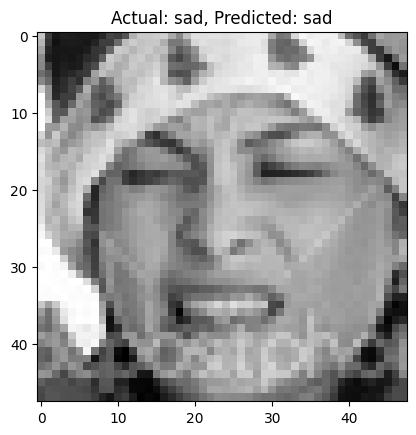

In [21]:
###########################
## Test on train data
cnn_classifier.eval()
# Define class names
class_names = ["happy", "sad"] # Add or modify as needed
# Get a random index from the test set
random_index = random.randint(0, len(train_dataset) - 1)
# Get the image and label at the random index
image, label = train_dataset[random_index]
image = image.to(device)
label = label.to(device)


output = cnn_classifier(image.unsqueeze(0))  # Unsqueeze to add batch dimension

# Apply threshold for binary classification
predicted_label = 1 if output > 0.5 else 0

# Convert labels to class names
actual_class = class_names[int(label)]
predicted_class = class_names[predicted_label]

# Check if the prediction is correct
is_correct = predicted_label == int(label)

# Print results
print(f"Actual Class: {actual_class}, Predicted Class: {predicted_class}, Correct: {is_correct}")

# Display the image
image = image.cpu().permute(1, 2, 0).numpy()  # Convert to numpy and rearrange dimensions
plt.imshow(image)
plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")
plt.show()


## Test From an image in the Test Dataset

In [22]:


cnn_classifier.eval()
random_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[random_index]
image = image.to(device)
label = label.to(device)


In [23]:
image.shape

torch.Size([3, 48, 48])

In [24]:
label

tensor(0)

Actual Label: 0, Predicted Label: 0, Correct: True


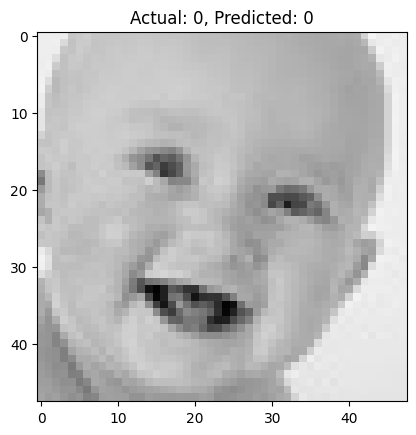

In [25]:
# Forward pass
output = cnn_classifier(image.unsqueeze(0))  # Unsqueeze to add batch dimension

# Apply threshold for binary classification
predicted_label = 1 if output > 0.5 else 0

# Convert labels to numpy arrays for easy comparison
actual_label = label.cpu().numpy()

# Check if the prediction is correct
is_correct = predicted_label == actual_label

# Print results
print(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}, Correct: {is_correct}")

# Display the image
image = image.cpu().permute(1, 2, 0).numpy()  # Convert to numpy and rearrange dimensions
plt.imshow(image)
plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
plt.show()


In [26]:


cnn_classifier.eval()

# Define class names
class_names = ["happy", "sad"]  # Add or modify as needed

# Get a random index from the test set
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]
image = image.to(device)
label = label.to(device)



Actual Class: sad, Predicted Class: sad, Correct: True


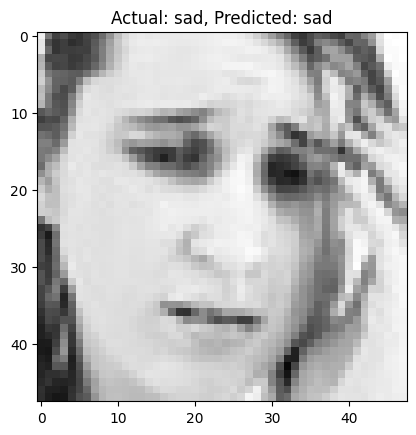

In [27]:

output = cnn_classifier(image.unsqueeze(0))  # Unsqueeze to add batch dimension

# Apply threshold for binary classification
predicted_label = 1 if output > 0.5 else 0

# Convert labels to class names
actual_class = class_names[int(label)]
predicted_class = class_names[predicted_label]

# Check if the prediction is correct
is_correct = predicted_label == int(label)

# Print results
print(f"Actual Class: {actual_class}, Predicted Class: {predicted_class}, Correct: {is_correct}")

# Display the image
image = image.cpu().permute(1, 2, 0).numpy()  # Convert to numpy and rearrange dimensions
plt.imshow(image)
plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")
plt.show()


## Onnx

In [28]:

# # Export the model to ONNX
# # Specify the input shape
# dimensions = torch.randn(1, 3, 48, 48).to(device)

# onnx_path = 'EmotionCnnOnnx.onnx'  # Specify the output path here
# torch.onnx.export(cnn_classifier, dimensions, onnx_path, verbose=True, input_names=['input'], output_names=['output'])

# # Load the ONNX model
# ort_session = onnxruntime.InferenceSession(onnx_path)

# # Prepare input data (adjust based on your input type and data)
# input_data = np.random.randn(1, 3, 48, 48).astype(np.float32)

# # Run inference
# ort_inputs = {ort_session.get_inputs()[0].name: input_data}
# output_name = ort_session.get_outputs()[0].name  # Get the name of the output
# ort_outs = ort_session.run([output_name], ort_inputs)

# # Print the output
# print("EmotionCnnOnnx output:", ort_outs)


In [33]:

# Assuming 'cnn_classifier' is your PyTorch model
dummy_input = torch.randn(1, 3, 48, 48)  # Adjust the size according to your input

# Provide the filename for the ONNX file
onnx_filename = "emotion_recognition_model.onnx"

# Export the model
torch.onnx.export(cnn_classifier, dummy_input, onnx_filename, opset_version=9, verbose=True)


============== Diagnostic Run torch.onnx.export version 2.0.1+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



## Figuring out the View Dimension

In [ ]:

my_tensor_test = torch.randn(1, 3, 48,  48)
my_tensor_test.shape


In [ ]:

mm_conv_transpose_test = nn.Conv2d(3, 10, kernel_size=5, stride=2)
            


In [ ]:

mm_res_test = mm_conv_transpose_test(my_tensor_test)


In [ ]:

mm_res_test.shape


In [ ]:

ll_conv_transp_test = nn.Conv2d(10, 10, kernel_size=3, stride=2)


In [ ]:

ll_res_test = ll_conv_transp_test(mm_res_test)
ll_res_test.shape


In [ ]:

vv_view = View( (1, -1) )
